# STUDY OF 2D ISING MODEL USING METROPOLIS-HASTINGS ALGORITHM

## Introduction
    
   Monte Carlo simulations and Metropolis algorithm are useful tools to solve problems in statistical physics where thermodynamic expectation values of some observables are of interest. In this project we apply this method to study the 2D Ising model since it has an analytic result which we can compare with our numerical solution in order to evaluate the strength of the algorithm and the quality of this numerical approach which can be extended to similar model which can no longer be treated analytically.
   Our study of Ising model using computer simulations consists of:
 - Simulating the 2D Ising model with lattice size, L = 2, 4, 8, 16 and 32 and then collecting the data i.e. observables such as Average Energy per spin <E>, Magnetisation per spin <M> and Absolute magnetization per spin<|M|>, Susceptibility per spin $\chi$ and Heat capacity per spin C. The data of these observables for each of the lattice sizes were stored in text files and recalled later.
 - Plotting the graphs for each of the observables versus temperature and studying their nature and behaviour at each of the lattice sizes as well as their divergence at critical temperature, $T_c$.
 - Visualization of the Ising model using Opencv software was done where in we saw how the 32x32 lattice looked like at different temperatures and with the corresponding magnetization curve plotted beside it, we were able to appreciate it even better.
 - Finite size scaling concept was introduced and critical exponents $\alpha$,$\beta$ and $\gamma$ were calculated with simulation data using the linear regression tools that we learnt during the course. A special mention to finding $\beta$ is that we also used differentiation from numpy module to find the point of inflection of the magnetization curve. And thus using those inflection points of Magnetization, ln-ln plot was done and again using regression $\beta$ was obtained.
 - The concept of Finite scaling was extended to include reduced plot where the data of various observables and different lattice sizes collapsed to the same curve which thus validated the correctness of the theoretical found critical exponents.
 - Comparison of cold start and hot start of the Ising model simualtion was done and studied.
 - The probability distribution of the order parameter was studied through plots wherein we obtained Bimodal distribution graph and it's behaviour with respect to change in lattice size and also with tempertures less than $T_c$, near $T_c$ and greater than $T_c$ were studied. 
 - Critical temperature, $T_c$ was also calculated by using Cumulant formula.
 - The correlation time, for different temperatures are estimated.
    
(Note to the reader: The graphs obtained during the simulation experiment have been attached)

## 2D Ising Model

The Ising model in 2d consists of dipole spins at regular lattice points with the spins either up(+y) or down(-y). The dimension of lattice is L with the number of spins, N = L x L. The interaction among the spins is restricted to nearest neighbours. 
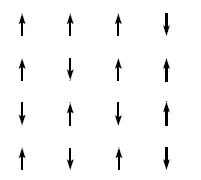
_Two Dimensional lattice illustration of an Ising Model. The up and down arrows represent a postive and a negative spin respectively._

Since the interactions are restricted to the nearest neighbour pairs only, the configuration energy is a simple function of probabilities of the nearest neighbor pairs and the hamiltonian for specific spin site, i is given by $H_i = -J\sum_{jnn} s_i s_j $, where jnn runs over the nearest neighbours of i. The coupling constant between nearest neighbours is represented by J while the $s_i$ and $s_j$ are the respective nearest neighbour spins. The nature of the interaction in the model is all contained in the sign of the interaction coupling constant J. If J is positive it would mean that the material has a ferromagnetic nature (parallel alignment) while a negative sign would imply that the material is antiferromagentic (favours anti-parallel alignment). J will be taken to be +1 in our discussion and the values for spins will be +1 for spin up and -1 for spin down. A further simplification is made in that J/kb is taken to be unity. 

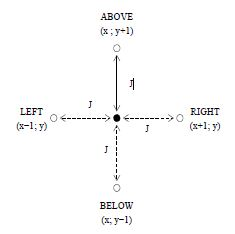
Nearest neighbour coupling. The dark dot, at position (x,y), is being interacted upon by its nearest neighbours which are one lattice spacing away from it.

To maximize the interaction of the spins at the edges of the lattice they are made to interact with the spins at the geometric opposite edges of the lattice. This is referred to as periodic boundary condition (pbc) and can be visualized better if we consider the 2d lattice being folded into a 3d torus with spins being on the surface of this topological structure.
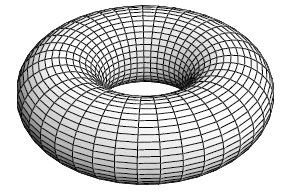

In most of the ordinary materials, the associated magnetic dipoles or spins are in random direction and thus the overall dipole moment is zero. But for ferromagnetic materials, when the temperature is below the Curie Temperature ($T_c$) we have magnetic moment produced as a result of preferred alignment of atomic spins. This behaviour is based on the principle of energy minimization but it is not the only one we have to consider, it has to be balanced against the competing principle of entropy maximization. If this principle was the only one to be considered we wouldn't be able to observe a spontaneous magnetization at any temperature instead we can observe this trend only when the temperature is above $T_c$.

Also, these 2 principles depend on Boltzmann distribution: $P(a) = exp\frac{-E(a)}{kT}$. This represents the probability for the system to be in each possible state 'a', at a given temperature and therefore macroscopic quantities of interest can be calculated by doing probability summing.
For example, for a given state a, the Magnetization is given by the 'excess' of spins pointing up or down and the energy is given by the Hamiltonian that we defined earlier. 

$M(a) = N_+ (a) - N_- (a)$

Expectation of M: $<M> = \sum_a{M(a) P(a)}$

Expectation of E: $<E> = \sum_a{E(a) P(a)}$

However, we see that the spins can be either up or down and there are N spins in given lattice, thus we have $2^N$ different states and when N becomes large this will be computationally challenging. This problem is solved using the concept of Importance sampling. 

The thermal average of a given observable A(x) which can be M, E, $\chi$, or C, is defined in the discrete form in the Canonical ensemble as: $$<A(x)> = \frac{\sum_{l=1}^{M} e^{-\beta H(x)} A(x)} {\sum_{l=1}^{M} e^{-\beta H(x)}}$$

(If we consider $M \rightarrow \infty$, then the summation in the above equation becomes an integral )
and the Partition function is given by: $Z = \sum_{l=1}^{M} e^{-\beta H(x_l)}$

The Probability with which the configuration x occurs is given by: $$P(x) = \frac{e^{-\beta H(x)}}{Z}$$

We use the concept of Importance sampling to include the important areas in the phase space. We thus sample the points $x_l$ from associated probability $P(x_l)$ in phase space. Thus the above thermal average of the observable becomes:
$$<A(x)> = \frac{\sum_{l=1}^{M} e^{-\beta H(x_l)} A(x_l)/P(x_l)} {\sum_{l=1}^{M} e^{-\beta H(x_l)} /P(x_l)}$$

The choice of $P(x_l)$ is $P(x_l) \propto e^{-\beta H(x_l)}$. Thus cancelling out the boltzmann factors we get: $$ <A(x)> = \frac{\sum_{l=1}^{M} A(x_l)} {M} $$. Here, the main idea is, we are attempting to reduce a probability distribution at equilibrium of the infinite phase space to a representative distribution with a finite set of points from the phase space, $x_l$. The method to generate this distribution was given by Metroplis et al.

With this transition probability $W(x_l \rightarrow x_{l+1})$, it was shown by them that the distribution $P(x_l)$ of states generated by Markov process tends to equilibrium distribution as M(number of Monte Carlo steps) becomes large. 

$P(x_l) \rightarrow equilibrium$ as $M \rightarrow \infty$

Thus as we consider larger and larger set of points in phase space, {$x_l$}, the accuracy of our result becomes better and equivalent to that of theory.

The rate of change of Probability distribution is given by Markovian Master equation:
$$\frac{dP(x,t)}{dt} = -\sum_x W(x_l \rightarrow x_{l+1}) + \sum_x W(x_{l+1} \rightarrow x_l) $$

In the thermal limit $P(x_l) = P_{eq}(x_l)$, at large times as $t\rightarrow\infty$, **Condition of Detailed balance** comes into picture. $$ P_{eq}(x_l) W(x_l \rightarrow x_{l+1}) = P_{eq}(x_{l+1}) W(x_{l+1} \rightarrow x_l) $$
resulting in $\frac{dP(x,t)}{dt} = 0$ as we expect. 

Since we are considering the time average of observables, which is given by $$<A(t)> = \frac{\int A(t) dt}{t_M} $$
This relation reduces to $$ <A(x)> = \frac{\sum_{l=1}^{M} A(x_l)} {M} $$ if we consider the number of Monte Carlo steps(mcs) as units of 'time'. Thus the Metropolis sampling can be interpreted as time averaging along a stochastic trajectory in phase space, controlled by the master equation of the system.

Finally, with the theory developed, we calculate the expectation of the observables $<E>, <E^2>, <M>, <|M|>$ and $<M^2>$ as follows:

$$<M> = \frac{\sum_{\alpha}^{N} M(\alpha)}{N} $$

$$<|M|> = \frac{\sum_{\alpha}^{N}|M(\alpha)|}{N} $$

$$<M^2> = \frac{\sum_{\alpha}^{N}M(\alpha)^2}{N} $$

To calculate energy we use Hamiltonian:
$$<E> = \frac{1}{2} <\sum_{i}^{N} H_i>  = \frac{1}{2} <-J\sum_{i}^{N} \sum_{jnn} s_i s_j>$$
the factor of a half is introduced in order to account for the spins being counted twice.
$<E^2>$ is calculated similarly.

At Curie temperatures we see marked fluctuations in these quantities and so we find Heat Capacity, C and the susceptibility, $\chi$. 

$$ C = \frac{\partial E}{\partial T} = \frac{(\Delta E)^2}{k_b T} = \frac{<E^2> - <E>^2}{k_b T^2} $$

$$ \chi = \frac{\partial M}{\partial T} = \frac{(\Delta M)^2}{k_b T} = \frac{<M^2> - <|M|>^2}{k_b T} $$


## Metropolis Algorithm
    
   The algorithm implemented for this simulation is the Metropolis Algorithm. The steps executed in the program are best summarized in a flowchart. From the flowchart, given below it is possible to attain a better conceptual feel for what the algorithm is attempting to achieve. 

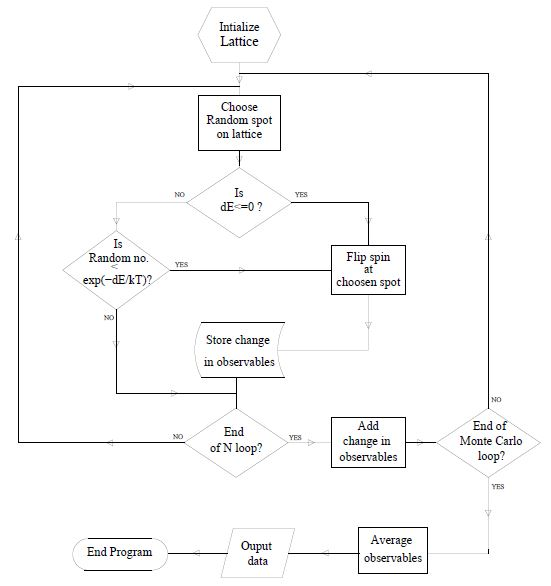

In the first step the lattice is **INITIALIZED** to a starting configuration. This may either be a homogeneous or random configuration. A random configuration has a benefit in that it uses less computing time to reach a equilibrated configuration with the associated heat bath.

 -  In the following **PROCESS** the random number generator is used to select a position on the lattice by producing a uniformly generated number between 1 and N.
 
 -  A **DECISION** is then made whether the change in energy of flipping that particular spin selected is lower than zero. This is in accordance with the principle of energy minimization.
    - If the change in energy is lower than zero then a **PROCESS** is invoked to flip the spin at the selected site and the associated change in the observables that want to be monitored are stored.
    - If the change in energy is higher than zero then a **DECISION** has to be used to establish if the spin is going to be flipped, regardless of the higher energy consideration. A random number is generated between 0 and 1 and then weighed against the Boltzmann Probability factor. If the random number is less than the associated probability, $e^{-\beta\delta H} $ then the spin is flipped (This would allow for the spin to be flipped as a result of energy absorbed from the heat bath, as in keeping with the principle of entropy maximization) else it is left unchanged in its original configuration. 
    
 - The above steps are repeated N times and checked at this point in a **DECISION** to determine if the loop is completed. The steps referred to here do not include the initialization which is only required once in the beginning of the algorithm.
 
 - Once the N steps are completed a **PROCESS** is used to add all the progressive changes in the lattice configuration together with the original configuration in order to produce a new lattice configuration.
 
 -  All these steps are, in turn, contained within a Monte Carlo loop. A **DECISION** is used to see if these steps are completed.
 
 -  Once the Monte Carlo loop is completed the program is left with, what amounts to, the sum of all the generated lattices within the N loops. A **PROCESS** is thus employed to average the accumulated change in observables over the number of spins and the number of Monte Carlo steps.
 
 - Lastly this data can be **OUTPUT** to a file or plot.


 
This run through the algorithm produces a set of observables for a specific temperature. Considering that we are interested in seeing a phase transition with respect to temperature we need to contain this procedure within a temperature loop in order to produce these observables for a range of temperatures. The program that was implemented for this discussion started at a temperature of T = 5 and progressively stepped down in temperature to T = 0.5 with intervals of $\delta$T = 0.1. The different lattice sizes considered where 2 × 2, 4 × 4, 8 × 8, 16 × 16 and 32 x 32. 10,000 Monte Carlo steps (mcs) per spin were used in order to ensure a large sample of data to average over. The physical variables calculated were <E>, <E^2>, <|M|> and <M^2>.

A problem that occurs after the initialization is that the configuration will, more than likely, not be in equilibrium with the heat bath and it will take a few Monte Carlo steps to reach a equilibrated state. The results produced during this period are called transient and aren’t of interest. We thus have to make provision for the program to disregard them. This is achieved by doing a run of a thousand Monte Carlo steps preceding the data collection of any statistics for a given temperature in order to ensure that it has reached a equilibrated state.
----To be sure that the transient period is longer enough we computed the evolution of the expectation value of the energy per particle <e> and the expectation value of magnetization per particle <m> for both the cold and hot initializations of the lattice. ----

We have saved the data for different lattices by exporting them from dataframe to txt files. These data were again imported for the process of plotting the graphs, calculating crtical exponents and also for the finite size scaling as well as plotting of reduced plots where the data collapses on a single curve thus validating the correctness of the critical exponents found in the theory.

**Transient iteration selection**

Hence as soon as thermalization is achieved the procedure to measure interesting observables can be started, we have to find how long the thermalization interval should last, i.e. the number of iterations needed. For this reason we plan to check the thermalization process and measure after every single sampling step and skip thermalization. The observables of interest are <_e_> and <_m_>, the expectation values of energy and magnetization per particle.
The values of the two observables are given by:
$$<e> = \frac{\sum_{i=1}^{N}|E(C_i)|}{N \cdot nc} \pm \sqrt{\frac{var(E)}{N\cdot nc}}$$

$$<m> = \frac{\sum_{i=1}^{N}|M(C_i)|}{N \cdot nc} \pm \sqrt{\frac{var(M)}{N\cdot nc}}$$

Where $E(C_i)$ and $M(C_i)$ are the total energy and magnetization of a given configuration $C_i$, N the total number of particles and _nc_ the total number of configuration assumed by the system from the beginning of the measurement.

We set T=4 which should be well above Tc according to the theory.

We initialized the lattice with two different ways:
- *cold start*, i.e. ferromagnetic state where all spins are aligned
- *hot start*, i.e. paramagnetic state where spin orientation is chosen at random for every site

## Code for 2D Ising Model simulation

In [14]:
# MONTE CARLO SIMULATION OF 2D ISING MODEL
import numpy as np
import pandas as pd
import math 
from numba import jit, int32, float64

# Function for choosing random position on the lattice
def choose_random_pos_lat():
    pos_x = np.random.choice(range(size)) #size is a Global variable
    pos_y = np.random.choice(range(size))
    return pos_x,pos_y

# Function for calculating energy at a particular position on lattice
@jit(nopython=True)
def energy_pos(pos_x, pos_y, lat):
    # periodic boundary conditions
    siz=lat.shape[0]
    if pos_y==siz-1:
        up=0
    else:
        up=pos_y+1
    if pos_y==0:
        down=siz-1
    else:
        down=pos_y-1
    if pos_x==0:
        left=siz-1
    else:
        left=pos_x-1
    if pos_x==siz-1:
        right=0
    else:
        right=pos_x+1
    # energy for specific position
    e=-1*(lat[pos_x][pos_y])*(lat[left][pos_y]+lat[right][pos_y]+lat[pos_x][up]+lat[pos_x][down])
    return e

# function for testing the validity of flipping a spin at a selected position
def test_flip(pos_x,pos_y,lat):
    global de # Making it a global variable for the later use outside the function
    de=-2*energy_pos(pos_x,pos_y,lat) # change in energy for specific spin
    if de<0:
        return True               # flip due to lower energy (Energy minimization)
    elif np.random.random()<np.exp(-de/T):
        return True               # flip due to heat bath (Entropy Maximization)
    else:
        return False              # no flip

# flip spin at given position
@jit(nopython=True)
def flip(pos_x,pos_y,lat):
    lat[pos_x][pos_y]=-lat[pos_x][pos_y]

# Function for disregarding transient results
def transient_results(lat, transient):
    for a in range(transient):
        for b in range(n):
            pos_x,pos_y = choose_random_pos_lat()    
            if test_flip(pos_x,pos_y,lat)==True:
                flip(pos_x,pos_y,lat)

@jit(nopython=True)
def total_magnetization(lat):
    return np.sum(lat) 

# Function for calculating total energy of lattice
def total_energy(lat):
    e=0
    for x in range(lat.shape[0]):
        for y in range(lat.shape[0]):
            e+=energy_pos(x,y,lat)
    return e

## Comparison of hot start and cold start

In [2]:
size=32
n=size**2
mcs=800         #number of iteration to test
T=4.0           # fixed temperature chosen well above Tc
M_list=[]
E_list=[]
lat_hot=np.random.randint(2, size=(size, size))*2 - 1
lat_cold=np.full((size,size), 1)
lat_list=[lat_hot, lat_cold]
# Temperature loop
for lat in lat_list:
    m_expected_list=[]
    e_expected_list=[]
    error_e=[]
    error_m=[]
    # observables adopt equilibriated lattice configuration values
    M=total_magnetization(lat)
    E=total_energy(lat)
    mtot=0
    etot=0
    # Monte Carlo loop
    for a in range(1, mcs+1):
        mtot+=M/n
        etot+=E/n
        m_expected_list.append(mtot/a)
        e_expected_list.append(etot/a)
        error_e.append(math.sqrt(np.var(e_expected_list)/a))
        error_m.append(math.sqrt(np.var(m_expected_list)/a))
        # Metropolis loop
        for b in range(n):
            pos_x,pos_y = choose_random_pos_lat()    
            if test_flip(pos_x,pos_y,lat)==True:
                flip(pos_x,pos_y,lat)
                # Adjust observables
                E+=2*de
                M+=2*lat[pos_x][pos_y]
                
    M_list.append([list(m_expected_list),error_m])
    E_list.append([list(e_expected_list),error_e])
    


In [4]:
# Converting the above list into pandas dataframe
df = pd.DataFrame({'m_avg_hot':M_list[0][0],'m_error_hot':M_list[0][1],'e_avg_hot':E_list[0][0],'e_error_hot':E_list[0][1],
                  'm_avg_cold':M_list[1][0],'m_error_cold':M_list[1][1],'e_avg_cold':E_list[1][0],'e_error_cold':E_list[1][1],})


# Storing of the data in csv format 
file_name = "HvC"+str(size)
df.to_csv(file_name, sep='\t',index=False)

In [ ]:
#Collecting the data
import pandas as pd

dfmh = pd.read_csv(r"HvC32",delimiter='\t')
dferrmh = pd.read_csv(r"HvC32",delimiter='\t')
dfeh = pd.read_csv(r"HvC32",delimiter='\t')
dferreh = pd.read_csv(r"HvC32",delimiter='\t')
dfmc = pd.read_csv(r"HvC32",delimiter='\t')
dferrmc = pd.read_csv(r"HvC32",delimiter='\t')
dfec = pd.read_csv(r"HvC32",delimiter='\t')
dferrec = pd.read_csv(r"HvC32",delimiter='\t')

#plot of the results
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1,figsize=(10, 12))
ax1.plot(np.arange(len(dfmh)),dfmh, '--', label='hot start')
ax1.plot(np.arange(len(dfmc)),dfmc, label='cold start') 
ax1.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax1.set_title("Time evolution of <m> at T = " + str(T) + " and lattice size = " + str(size) )
ax1.set_xlabel("iterations")
ax1.set_ylabel("<m>")
ax1.fill_between(np.arange(len(dfmh)),[sum(x) for x in zip(dfmh,dferrmh)],np.subtract(dfmh,dferrmh), alpha=0.4)
ax1.fill_between(np.arange(len(dfeh)),[sum(x) for x in zip(dfmc,dferrmc)],np.subtract(dfmc,dferrmc), alpha=0.4)
ax2.plot(np.arange(len(dfeh)),dfeh, '--', label='hot start')
ax2.plot(np.arange(len(dfec)),dfec, label='cold start')    
ax2.set_title("Time evolution of <e> at T = " + str(T) + " and size = " + str(size))
ax2.set_xlabel("iterations")
ax2.set_ylabel("<e>")
ax2.fill_between(np.arange(len(dfeh)),[sum(x) for x in zip(dfeh,dferreh)],np.subtract(dfeh,dferreh), alpha=0.4)
ax2.fill_between(np.arange(len(dfec)),[sum(x) for x in zip(dfec,dferrec)],np.subtract(dfec,dferrec), alpha=0.4)
ax2.legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
ax1.grid(linestyle='--',alpha=0.5)
ax2.grid(linestyle='--',alpha=0.5)
plt.show();

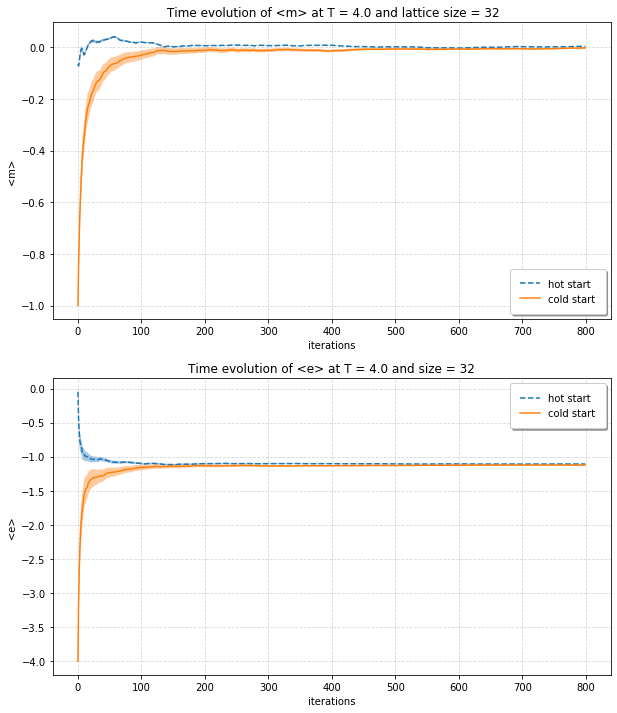

According to the first plot indeed we can see that in both cases corresponding to the two different inizializations <_m_> approaches <m> reaches zero after a rather short thermalization period independent of the starting procedure. 
A similar behaviour is shown also in the second plot where <_e_> approaches saturation (but the equilibrium value is different from zero) just after less than 200 iterations. 

## Measurements of the variables

In [ ]:
# Structure for 2d lattice with coordinates x and y
                   
size=32                    # Size of the lattice
n=size*size                # number of spin points on lattice
T=5.0                      # starting point for temperature
minT=0.5                   # minimum temperature
change=0.1                 # size of steps for temperature loop
mcs=int(1e4)               # number of Monte Carlo steps
transient=1000             # number of transient steps
norm=(1.0/float(mcs*n))    # normalization for averaging
np.random.seed(436675)     # seed for random number generator

# 2d Array for random initialization of lattice
# Gives a randomized lattice consisting of +1 and -1
# initialize the lattice to random configuration
lat =  np.random.randint(2, size=(size, size))*2 - 1

# declaring the variables in calculating the observables 
# E, Esq, Esq_avg, E_avg, etot, etotsq = np.float64(0),np.float64(0),np.float64(0),np.float64(0),np.float64(0),np.float64(0)
# M, Msq, Msq_avg, M_avg, mtot, mtotsq = np.int64(0),np.int64(0),np.float64(0),np.float64(0),np.float64(0),np.float64(0)
# Mabs, Mabs_avg, mabstot = np.int64(0),np.float64(0),np.float64(0)

de = 0.0
# initialize lattice to random configuration
# already done at the start

# Creating an empty list of observables where data for each T has to be appended
E_avg_list = []
Esq_avg_list = []

M_avg_list = [] 
Msq_avg_list = []
Mabs_avg_list = []
Mq_avg_list = []

X_list = []       # susceptibility per spin (X)
X_prime_list = [] # susceptibility per spin (X’)
C_list = []       # heat capacity (C) per spin
    

# Temperature loop
for T in np.round(np.arange(minT,T+change,change),2):
    # transient function
    transient_results(lat, transient)
    
    # observables adopt equilibriated lattice configuration values
    M=total_magnetization(lat)
    Mabs=abs(M)
    E=total_energy(lat)
    
    # initialize summation variables at each temperature step
    etot=0
    etotsq=0
    mtot=0
    mtotsq=0
    mabstot=0
    
    # Monte Carlo loop
    for a in range(mcs):
        # Metropolis loop
        for b in range(n):
            pos_x,pos_y = choose_random_pos_lat()    
            if test_flip(pos_x,pos_y,lat)==True:
                flip(pos_x,pos_y,lat)
                # Adjust observables
                E+=2*de
                M+=np.int64(2*lat[pos_x][pos_y])
                Mabs+=abs(np.int64(lat[pos_x][pos_y]))
        # Keep summation of variables
        etot+=np.float64(E/2) # so as not to count the energy for each spin twice
        etotsq+=np.float64(E/2.0)*np.float64(E/2.0)
        mtot+=np.int64(M)
        mtotsq+=(np.int64(M)*np.int64(M))
        mabstot+=np.sqrt(np.int64(M)*np.int64(M))
    
    # average observables
    # <E>;<E^2> per spin
    E_avg = etot*norm
    Esq_avg = etotsq*norm
    # <M>;<|M|>;<M^2> per spin
    M_avg = mtot*norm 
    Msq_avg = mtotsq*norm
    Mabs_avg = mabstot*norm
    
    X = (Msq_avg-(M_avg*M_avg*n))/(T) # susceptibility per spin (X)
    X_prime = (Msq_avg-(Mabs_avg*Mabs_avg*n))/(T) #susceptibility per spin (X’)
    C=(Esq_avg-(E_avg*E_avg*n))/(T*T) #heat capacity (C) per spin
    
    # Appending the above data into list
    E_avg_list.append(E_avg)
    Esq_avg_list.append(Esq_avg)
    
    M_avg_list.append(M_avg) 
    Msq_avg_list.append(Msq_avg)
    Mabs_avg_list.append(Mabs_avg)
    
    X_list.append(X) # susceptibility per spin (X)
    X_prime_list.append(X_prime) # susceptibility per spin (X’)
    C_list.append(C) # heat capacity (C) per spin
    # saving the lattice at each T
    lattice_file = "C:\\Users\\TEST\\Desktop\\Project Comp physics\\lattice_32\\32T_"+str(T)+".txt"
    np.savetxt(lattice_file,lat,fmt='%.0f')    

# Converting the above list into pandas dataframe
df = pd.DataFrame({'T':list(np.round(np.arange(minT,T+change,change),2)),'E_avg': E_avg_list,'Esq_avg': Esq_avg_list,
                   'M_avg':M_avg_list,'Msq_avg':Msq_avg_list,'Mabs_avg':Mabs_avg_list,
                   'X':X_list,'X_prime':X_prime_list,'C':C_list})

# Storing of the data in csv format 
file_name = "L"+str(size)
df.to_csv(file_name, sep='\t',index=False)


## Plots of observables w.r.t temperature

In [ ]:
# Collecting the data

# Loading all the csv files into pandas dataframe
df2 = pd.read_csv(r"L2",delimiter='\t')
df4 = pd.read_csv(r"L4",delimiter='\t')
df8 = pd.read_csv(r"L8",delimiter='\t')
df16 = pd.read_csv(r"L16",delimiter='\t')
df32 = pd.read_csv(r"L32",delimiter='\t')


### Plotting Energy per spin (E/N) vs Temperature (T)

In [ ]:
#%%
# Plotting Energy per spin (E/N) vs Temperature (T)

plt.plot(df2['T'],df2['E_avg'],'+--',markersize=5,label='L=2')
plt.plot(df4['T'],df4['E_avg'],'x--',lw=0.8,markersize=5,label='L=4')
plt.plot(df8['T'],df8['E_avg'],'^--',lw=0.7,markersize=4,label='L=8')
plt.plot(df16['T'],df16['E_avg'],'s--',lw=0.6,markersize=4, markerfacecolor='None',label='L=16')
plt.plot(df32['T'],df32['E_avg'],'o--',lw=0.5,markersize=4, markerfacecolor='None',label='L=32')

#Plotting the verticle line for critical temperature Tc=2.269K which is found theoretically by Onsager.
plt.axvline(x=2.269,c='r',linestyle='--')

#Finding the minimum value of the observable, E_avg so that we can easily place the text Tc=2.269 at that point.
all_lists = np.concatenate([df2["E_avg"],df4["E_avg"],df8["E_avg"],df16["E_avg"],df32["E_avg"]])
plt.text(2.269,np.min(all_lists),'Tc=2.269',size=12,c='r',weight='bold')

#Other fubctions to make the graph neat.
plt.xticks(np.arange(0.5, 5+0.5, step=0.5))
plt.yticks()
plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5)
plt.legend(loc="best")
plt.xlim([np.min(df2['T']),np.max(df2['T'])])
plt.ylim([-2,-0.4])
plt.title("Energy per spin (E/N) vs Temperature (T)")
plt.xlabel("Temperature (T)")
plt.ylabel("Energy per spin (E/N)")
plt.show()


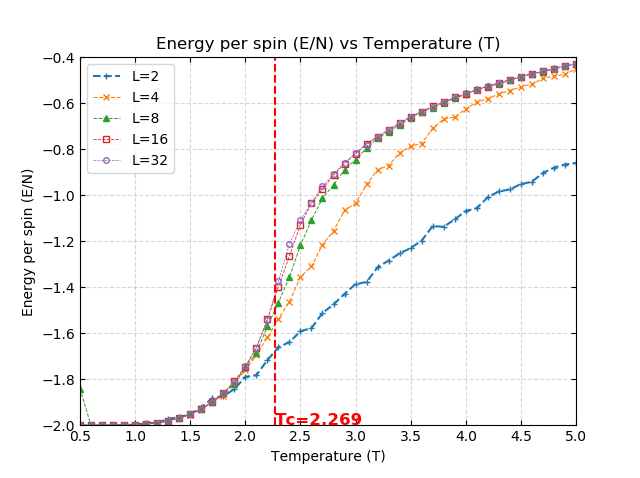
This plot shows the differing results of the Energy for varying lattice sizes, L × L.

The curve of the graph becomes more pronounced as the lattice size increases but there isn’t a marked difference between the L = 8, L = 16 and L = 32 lattices. The steep gradient in the larger lattices points towards a possible phase transition but isn’t clearly illustrated but the same clear illustartion can be seen much better in the plot of Magnetisation per spin versus tempaerature. The energy per spin for higher temperatures is relatively high which is in keeping with our expectation of having a random configuration while it stabilizes to a E/N = −2J = −2 at low temperatures. This indicates that the spins are all aligned in parallel.

###  Plotting Absolute Magnetization per spin (<|M|>/N) vs Temperature (T)

In [ ]:
# Plotting Absolute Magnetization per spin (<|M|>/N) vs Temperature (T)

plt.plot(df2['T'],df2['Mabs_avg'],'+--',markersize=5,label='L=2')
plt.plot(df4['T'],df4['Mabs_avg'],'x--',lw=0.8,markersize=5,label='L=4')
plt.plot(df8['T'],df8['Mabs_avg'],'^--',lw=0.7,markersize=4,label='L=8')
plt.plot(df16['T'],df16['Mabs_avg'],'s--',lw=0.6,markersize=4, markerfacecolor='None',label='L=16')
plt.plot(df32['T'],df32['Mabs_avg'],'o--',lw=0.6,markersize=4, markerfacecolor='None',label='L=32')
plt.axvline(x=2.269,c='r',linestyle='--')
all_lists = np.concatenate([df2["Mabs_avg"],df4["Mabs_avg"],df8["Mabs_avg"],df16["Mabs_avg"],df32["Mabs_avg"]])
plt.text(2.269,np.min(all_lists),'Tc=2.269',size=12,c='r',weight='bold')

plt.xticks(np.arange(0.5, 5+0.5, step=0.5))
plt.yticks(np.arange(0, 1+0.1, step=0.1))
plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5)
plt.legend(loc="best")
plt.xlim([np.min(df2['T']),np.max(df2['T'])])
plt.ylim([0,1])
plt.title("Absolute Magnetization per spin (<|M|>/N) vs Temperature (T)")
plt.xlabel("Temperature (T)")
plt.ylabel("Absolute Magnetization (<|M|>/N)")
plt.show()


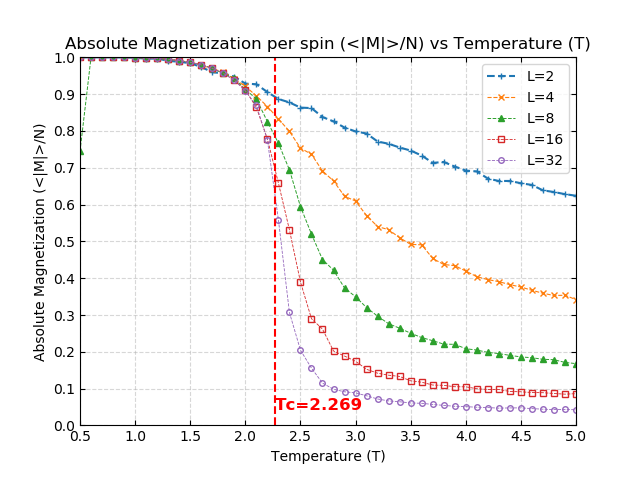
This plot shows the differing results of the Magnetization for varying lattice sizes, L × L.

The magnetization results shows very beautifully that the shape of the gradient becomes more distinct as the lattice size is increased. Furthermore, as opposed to graph of Energy vs T, there is a far more apparent difference that the larger lattices produce in the curves and this illustrates a more apparent continuous phase transition. The behaviour of the magnetization at high and low temperature are as the theory prescribes (random to stable parallel aligned configuration).

### Plotting Magnetic Susceptibility per spin (X'/N) vs Temperature (T)

In [ ]:
# Plotting Magnetic Susceptibility per spin (X'/N) vs Temperature (T)

plt.plot(df2['T'],df2['X_prime'],'+--',markersize=5,label='L=2')
plt.plot(df4['T'],df4['X_prime'],'x--',lw=0.8,markersize=5,label='L=4')
plt.plot(df8['T'],df8['X_prime'],'^--',lw=0.7,markersize=4,label='L=8')
plt.plot(df16['T'],df16['X_prime'],'s--',lw=0.6,markersize=4, markerfacecolor='None',label='L=16')
plt.plot(df32['T'],df32['X_prime'],'o--',lw=0.6,markersize=4, markerfacecolor='None',label='L=32')
plt.axvline(x=2.269,c='r',linestyle='--')
all_lists = np.concatenate([df2["X_prime"],df4["X_prime"],df8["X_prime"],df16["X_prime"],df32["X_prime"]])
plt.text(2.269,np.min(all_lists),'Tc=2.269',size=12,c='r',weight='bold')

plt.xticks(np.arange(0.5, 5+0.5, step=0.5))
#plt.yticks(range(0, 7))
plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5)
plt.legend(loc="best")
plt.xlim([0.5,5])
plt.ylim([0,21])
plt.title("Magnetic Susceptibility per spin (X'/N) vs Temperature (T)")
plt.xlabel("Temperature (T)")
plt.ylabel("Magnetic Susceptibility per spin (X'/N)")
plt.show()


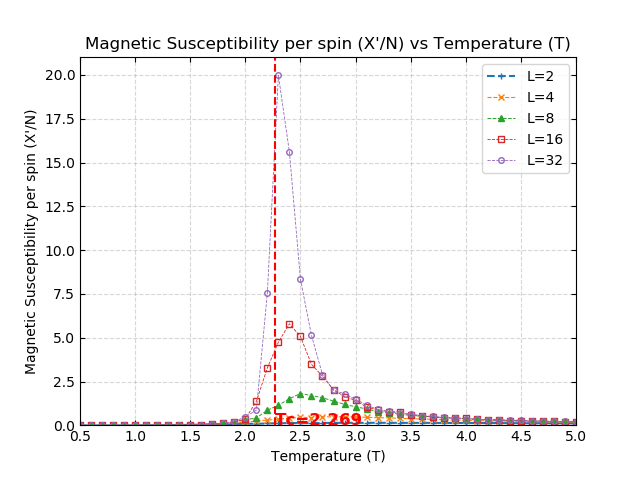
This plot shows the differing results of the susceptibility for varying lattice sizes, L × L.

We see more dramatic peaks here of the magnetic susceptibility $\chi$ per spin versus temperature as a result. This, once again, doesn’t show an exact divergence but shows a sharp peak for the L = 32 lattice. The divergence isn't seen but a peak is seen because of the Finite size of the lattice. This should be strong evidence for second order phase transition. We notice the for the given theoretical value of Critical temperature, Tc = 2.269, the susceptibilty diverges in accordance with the theory.


### Plotting Specific heat capacity per spin (C/N) vs Temperature (T) 

In [ ]:
# Plotting Specific heat capacity per spin (C/N) vs Temperature (T)

plt.plot(df2['T'],df2['C'],'+--',markersize=5,label='L=2')
plt.plot(df4['T'],df4['C'],'x--',lw=0.8,markersize=5,label='L=4')
plt.plot(df8['T'],df8['C'],'^--',lw=0.7,markersize=4,label='L=8')
plt.plot(df16['T'],df16['C'],'s--',lw=0.6,markersize=4, markerfacecolor='None',label='L=16')
plt.plot(df32['T'],df32['C'],'o--',lw=0.6,markersize=4, markerfacecolor='None',label='L=32')
plt.axvline(x=2.269,c='r',linestyle='--')
all_lists = np.concatenate([df2["C"],df4["C"],df8["C"],df16["C"],df32["C"]])
plt.text(2.269,np.min(all_lists),'Tc=2.269',size=12,c='r',weight='bold')

plt.xticks(np.arange(0.5, 5+0.5, step=0.5))
#plt.yticks(range(0, 7))
plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5)
plt.legend(loc="best")
plt.xlim([0.5,5])
plt.ylim([0,2.1])
plt.title("Specific heat capacity per spin (C/N) vs Temperature (T)")
plt.xlabel("Temperature (T)")
plt.ylabel("Specific heat capacity per spin (C/N)")
plt.show()


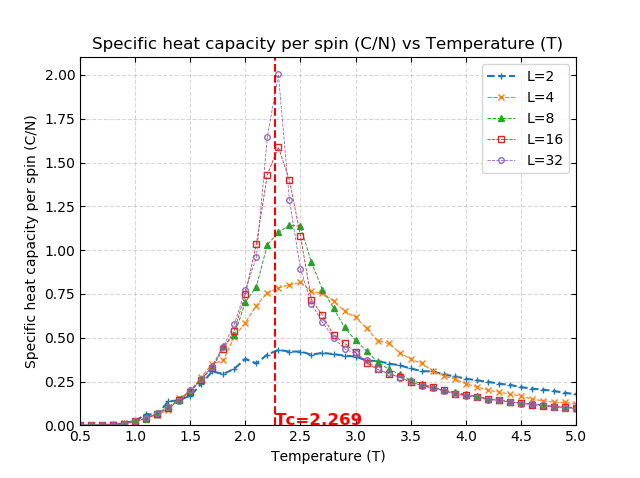
This plot shows the differing results of Specific Heat Capacity for varying lattice sizes, L × L.
The point at which the plot is peaked should be noted as a possible point of divergence. So, the simulation gives us enough confidence that supports the theory i.e. at T = Tc = 2.269 there exists divergence.

### Combined plot of all graphs

In [ ]:
#All in one graph
# Here we try and plot all the graphs in a single axis for better comparison and understanding.
#Plotting a single graph

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading all the csv files into pandas dataframe
df2 = pd.read_csv(r"L2",delimiter='\t')
df4 = pd.read_csv(r"L4",delimiter='\t')
df8 = pd.read_csv(r"L8",delimiter='\t')
df16 = pd.read_csv(r"L16",delimiter='\t')
df32 = pd.read_csv(r"L32",delimiter='\t')

# Plotting Energy per spin (E/N) vs Temperature (T)
plt.figure()
plt.subplot(2,2,1)
plt.plot(df2['T'],df2['E_avg'],'+--',markersize=5,label='L=2')
plt.plot(df4['T'],df4['E_avg'],'x--',lw=0.8,markersize=5,label='L=4')
plt.plot(df8['T'],df8['E_avg'],'^--',lw=0.7,markersize=4,label='L=8')
plt.plot(df16['T'],df16['E_avg'],'s--',lw=0.6,markersize=4, markerfacecolor='None',label='L=16')
plt.plot(df32['T'],df32['E_avg'],'o--',lw=0.5,markersize=4, markerfacecolor='None',label='L=32')

#Plotting the verticle line for critical temperature Tc=2.269K which is found theoretically by Onsager.
plt.axvline(x=2.269,c='r',linestyle='--')
#Finding the minimum value of the observable, E_avg so that we can easily place the text Tc=2.269 at that point.
all_lists = np.concatenate([df2["E_avg"],df4["E_avg"],df8["E_avg"],df16["E_avg"],df32["E_avg"]])
plt.text(2.269,np.min(all_lists),'Tc=2.269',size=12,c='r',weight='bold')
#Other fubctions to make the graph neat.
plt.xticks(np.arange(0.5, 5+0.5, step=0.5))
plt.yticks()
plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5)
plt.legend(loc="best")
plt.xlim([np.min(df2['T']),np.max(df2['T'])])
plt.ylim([-2,-0.4])
#plt.title("Energy per spin (E/N) vs Temperature (T)")
#plt.xlabel("Temperature (T)")
plt.ylabel("Energy per spin (E/N)")

# Plotting Absolute Magnetization per spin (<|M|>/N) vs Temperature (T)
plt.subplot(2,2,3)
plt.plot(df2['T'],df2['Mabs_avg'],'+--',markersize=5,label='L=2')
plt.plot(df4['T'],df4['Mabs_avg'],'x--',lw=0.8,markersize=5,label='L=4')
plt.plot(df8['T'],df8['Mabs_avg'],'^--',lw=0.7,markersize=4,label='L=8')
plt.plot(df16['T'],df16['Mabs_avg'],'s--',lw=0.6,markersize=4, markerfacecolor='None',label='L=16')
plt.plot(df32['T'],df32['Mabs_avg'],'o--',lw=0.6,markersize=4, markerfacecolor='None',label='L=32')
plt.axvline(x=2.269,c='r',linestyle='--')
all_lists = np.concatenate([df2["Mabs_avg"],df4["Mabs_avg"],df8["Mabs_avg"],df16["Mabs_avg"],df32["Mabs_avg"]])
plt.text(2.269,np.min(all_lists),'Tc=2.269',size=12,c='r',weight='bold')

plt.xticks(np.arange(0.5, 5+0.5, step=0.5))
plt.yticks(np.arange(0, 1+0.1, step=0.1))
plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5)
plt.legend(loc="best")
plt.xlim([np.min(df2['T']),np.max(df2['T'])])
plt.ylim([0,1])
#plt.title("Absolute Magnetization per spin (<|M|>/N) vs Temperature (T)")
plt.xlabel("Temperature (T)")
plt.ylabel("Absolute Magnetization\n (<|M|>/N)")


# Plotting Magnetic Susceptibility per spin (X'/N) vs Temperature (T)
plt.subplot(2,2,2)
plt.plot(df2['T'],df2['X_prime'],'+--',markersize=5,label='L=2')
plt.plot(df4['T'],df4['X_prime'],'x--',lw=0.8,markersize=5,label='L=4')
plt.plot(df8['T'],df8['X_prime'],'^--',lw=0.7,markersize=4,label='L=8')
plt.plot(df16['T'],df16['X_prime'],'s--',lw=0.6,markersize=4, markerfacecolor='None',label='L=16')
plt.plot(df32['T'],df32['X_prime'],'o--',lw=0.6,markersize=4, markerfacecolor='None',label='L=32')
plt.axvline(x=2.269,c='r',linestyle='--')
all_lists = np.concatenate([df2["X_prime"],df4["X_prime"],df8["X_prime"],df16["X_prime"],df32["X_prime"]])
#plt.text(2.269,np.min(all_lists),'Tc=2.269',size=12,c='r',weight='bold')

plt.xticks(np.arange(0.5, 5+0.5, step=0.5))
#plt.yticks(range(0, 7))
plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5)
plt.legend(loc="best")
plt.xlim([0.5,5])
plt.ylim([0,21])
#plt.title("Magnetic Susceptibility per spin (X'/N) vs Temperature (T)")
#plt.xlabel("Temperature (T)")
plt.ylabel("Magnetic Susceptibility\n per spin (X'/N)")


# Plotting Specific heat capacity per spin (C/N) vs Temperature (T)
plt.subplot(2,2,4)
plt.plot(df2['T'],df2['C'],'+--',markersize=5,label='L=2')
plt.plot(df4['T'],df4['C'],'x--',lw=0.8,markersize=5,label='L=4')
plt.plot(df8['T'],df8['C'],'^--',lw=0.7,markersize=4,label='L=8')
plt.plot(df16['T'],df16['C'],'s--',lw=0.6,markersize=4, markerfacecolor='None',label='L=16')
plt.plot(df32['T'],df32['C'],'o--',lw=0.6,markersize=4, markerfacecolor='None',label='L=32')
plt.axvline(x=2.269,c='r',linestyle='--')
all_lists = np.concatenate([df2["C"],df4["C"],df8["C"],df16["C"],df32["C"]])
plt.text(2.269,np.min(all_lists),'Tc=2.269',size=12,c='r',weight='bold')

plt.xticks(np.arange(0.5, 5+0.5, step=0.5))
#plt.yticks(range(0, 7))
plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5)
plt.legend(loc="best")
plt.xlim([0.5,5])
plt.ylim([0,2.1])
#plt.title("Specific heat capacity per spin (C/N) vs Temperature (T)")
plt.xlabel("Temperature (T)")
plt.ylabel("Specific heat capacity\n per spin (C/N)")
plt.tight_layout()
plt.show()


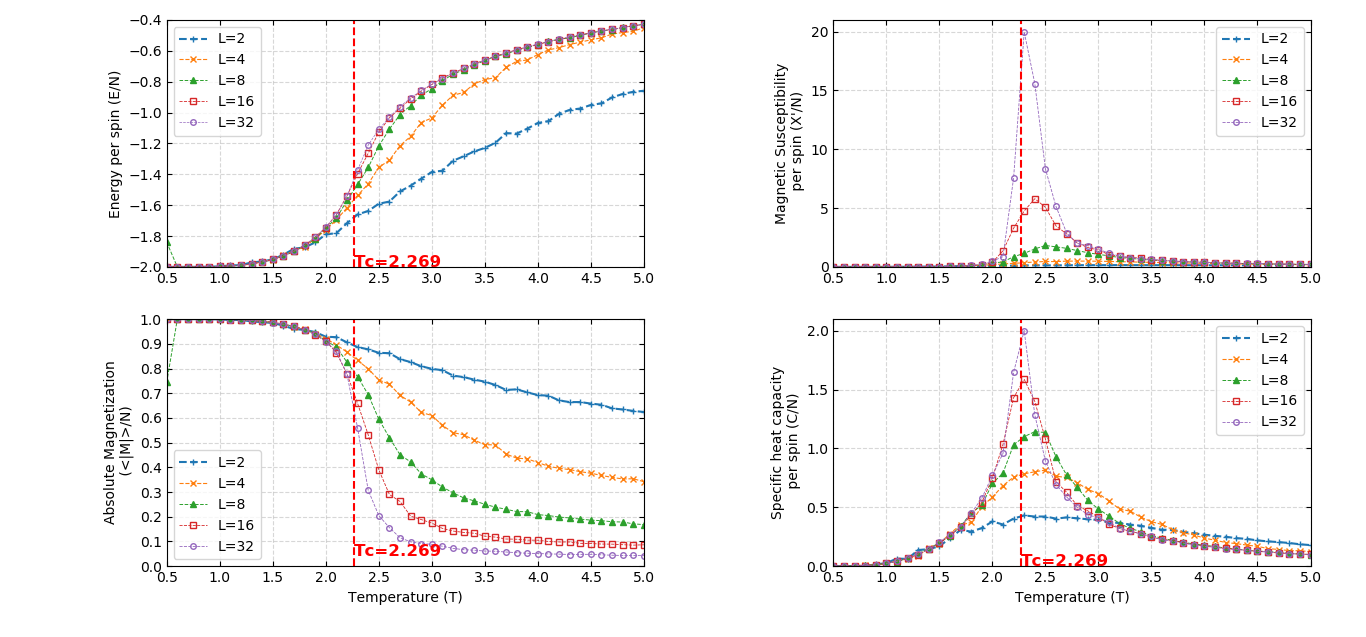

## Ising model "animated" simulation for 32 x 32 matrix with 2 fps and temperature step size of 0.1 from T=0.5 to T=5. 

The process of obtaining an animated version of simulation for better visual understanding is as follows:
 - The data  was collected for 2d lattice array for 32x32 lattice model at each temperature in the loop of the above Metropolis algorithm. It was stored as txt file at a given location.
 - Then we loaded this matrix into numpy array and converted into 0's and 1's instead of -1's and 1's for plotting it into a meshgrid which looks like a checker board where the white square represents -1 spin and black square represents +1 spin.
 - The Checker board now represents an Ising model visually and beside that we also plotted Magnetization curve as a subplot to match the checker board so that we now know better how the lattice looks at a given temperature and given magnetization.
 - We plot all the graphs as shown below from T=0.5 to T=5 with step size fo T=0.1 :
 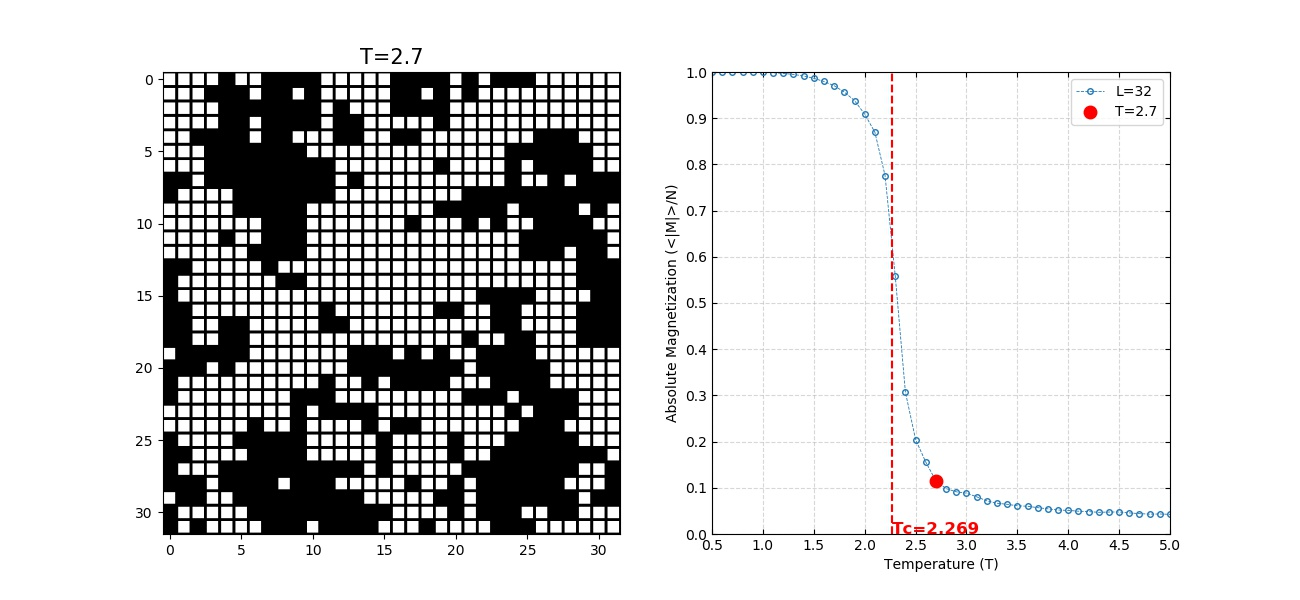
 - These graphs are now representing the frames which was then converted into a video format .avi using opencv library. The opencv library was installed seperately for the python. Using this library, we took all these plots as input and now we name them as frame0, frame1 so on and we combine all of them into making a video with 2 fps(Frames per second).
 

### Code for storing the graphs in a given location which comes out as frames for video

In [ ]:
# Store them as frames for each single step size of T
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import pandas as pd

# Simulation from t=0.5 to 5 and from t=5 back to 0.5
temp = list(np.round(np.arange(0.5,5+0.1,0.1),2))
t_reverse=list(np.round(np.arange(5,0.5-0.1,-0.1),2))
temp.extend(t_reverse)

for i,t in zip(range(len(temp)),temp): 
    fig = plt.figure(figsize=(13,6))
    
    plt.subplot(1,2,1)
    # Plotting checker board representing the Ising model and plot of the corresponding Magnetization side by side
    # load the text in the form of matrix into a numpy array
    mat = np.loadtxt('./lattice_32/32T_%s.txt'%str(t),delimiter=' ',dtype=int)
    mat=(mat+1)/2 # Converting to (0,1) instead of (-1,1)
    # Here we represent -1 spin--->White +1 spin----->Black
    cmap = colors.ListedColormap(['white','black'])
    plt.pcolor(mat,cmap=cmap,edgecolors='k', linewidths=2)
    plt.xticks(np.arange(0.5,32.5,5),range(0,32,5))
    plt.xlim([0,32])
    plt.ylim([0,32])
    plt.yticks(np.arange(31.5,-1.5,-5),list(range(0,32,5)))
    plt.title("T="+str(t),size=15)
    
    
    df32 = pd.read_csv(r"L32",delimiter='\t')
    
    # Plotting Absolute Magnetization per spin (<|M|>/N) vs Temperature (T)
    plt.subplot(1,2,2)
    plt.plot(df32['T'],df32['Mabs_avg'],'--',lw=0.6,label='L=32')
    plt.plot(t,df32[df32['T']==t]['Mabs_avg'],'o',c='r',markersize='9',label='T='+str(t))
    plt.axvline(x=2.269,c='r',linestyle='--')
    plt.text(2.269,0,'Tc=2.269',size=12,c='r',weight='bold')
    
    plt.xticks(np.arange(0.5, 5+0.5, step=0.5))
    plt.yticks(np.arange(0, 1+0.1, step=0.1))
    plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
    plt.grid(linestyle='--',alpha=0.5)
    plt.legend(loc="best")
    plt.xlim([np.min(df32['T']),np.max(df32['T'])])
    plt.ylim([0,1])
    plt.xlabel("Temperature (T)")
    plt.ylabel("Absolute Magnetization (<|M|>/N)")
    
    filename = './Ising_32x32_simulation/'
    
    # Saving the combined subplots for each temperature in a folder
    plt.savefig(filename+'frame'+str(i)+'.jpg')
    plt.close()
    #plt.show()


### Converting those stored plots a.k.a the frames into video format using opencv library of Python.

In [ ]:
# Converting those stored plots a.k.a the frames into video format using opencv library of Python.
import cv2
import numpy as np
import os
 
from os.path import isfile, join
 
def convert_frames_to_video(pathIn,pathOut,fps):
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
 
    # for sorting the file names properly
    files.sort(key = lambda x: int(x[5:-4]))
 
    for i in range(len(files)):
        filename=pathIn + files[i]
        # reading each files
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        print(filename)
        # inserting the frames into an image array
        frame_array.append(img)
     
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
 
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()

pathIn= './Ising_32x32_simulation/'
pathOut = 'Ising32.avi'
fps = 2 #frames per second in the video
convert_frames_to_video(pathIn, pathOut, fps)


## Video demonstration of Ising Model 2d, 2 fps from T=0.5 to T=5 with step size 0.5 

[Ising Model L=32, 2fps step size T=0.5](https://drive.google.com/open?id=122E1ke7T4ukNodNYFL-Ze5AFIK0CkJX9)

## Video demonstration of Ising Model 2d, 10 fps from T=0.5 to T=5 with step size 0.02 

[Ising model L=32, 10fps step size T=0.02](https://drive.google.com/open?id=1MvX--jPLNxxi1fUL0EYFYYxiZpqn-oOT)

[Ising model L=32, 15fps](https://drive.google.com/open?id=1j7L-XY2UonnH9L3SFzaR5qli6sexL9Ia)

The main idea/takeaway from this simulation of 2d Ising model in the form of checker board format where the white cell represents -1 and black cell represents +1 is that:
 - At lower temperatures, $T<<T_c$, almost all the spins point globally in a single direction. 
 - At higher temperatures $T>>T_c$, the spins starts pointing in random directions and the up and down spins are more distributed.
 - However, we see a jump of spins in the 1st video simulation 2fps with step size T=0.5, where in there is a huge jump of global spins from -1 spin to +1 spin in the vicinity of the critical temperature i.e. at T=2.1 to T=2.2. This phenomenon is explained because of the finite size of the lattice considered which makes the spins to jump from one state to another(i.e. L=32 exactly). 

## Finite Size Scaling:

One of the limitations of simulation that we have done for Ising Model is that it is of finite size of our lattice. This results in a problem of recognizing the specific point at which the phase transition occurs. This should be at a theoretical point of divergence but we are limited by the size of the lattice under consideration and thus we don't see this divergence. This effect is minimized by using periodic boundary conditions but would only be resolved if we were to consider an infinitely sized lattice as with the associated theoretical values for the phase transition. It is thus necessary to use a construct that will allow us to extrapolate the respective theoretical value given the limited resource of a finite sized lattice. The aptly named procedure of finite size scaling is used to do just this.

It becomes useful to define a critical exponent as a construct for the finite size scaling procedure to better understand the nature of the divergence near the critical temperature. The critical exponent, $\lambda$, is given by \begin{equation*}\lambda = lim_{t→0} \frac{ln|F(t)|}{|t|}\end{equation*} or more commonly written as \begin{equation*} F(t) \sim |t|^\lambda \end{equation*} , where t = (T − Tc). This exponent is important because it offers a more universal characteristic for differing data collected. This attribute of this critical exponent and its advantage is shown in a reduced unit plot the data collapses to a common curve with the same critical exponent. 

The critical exponents relevant to the Ising model are as follows:
$$
\begin{eqnarray}
\xi(T) \sim |T-T_c|^{-\nu} \\ 
M(T) \sim |T_c-T|^\beta \\
C \sim |T-T_c|^{-\alpha}  \\
\chi \sim |T-T_c|^{-\gamma} 
\end{eqnarray}
$$

the relationship between the lattice size, L, with respect to the temperature relationship, $|T − T_c|$, we discover that 
$|T − T_c| << 1  as  L \to \infty$.
Thus a critical exponent is also applicable for the lattice size. This produces \begin{equation*} L \sim |T_c(L = \infty) − T_c(L)|^{-\nu} \end{equation*} which can in turn be used to reduce the above exponents for the Ising model to a more appropriate form, in terms of lattice size.


$$
\begin{eqnarray}
\xi(T) \sim |T-T_c|^{-\nu} \to L\\ 
M(T) \sim |T_c-T|^\beta \to L^\frac{-\beta}{\nu}\\
C \sim |T-T_c|^{-\alpha} \to L^\frac{\alpha}{\nu} \\
\chi \sim |T-T_c|^{-\gamma} \to L^\frac{\gamma}{\nu}
\end{eqnarray}
$$


We have used the above equations and determined their appropriate exponents. This is simply done by taking the peak values for the collected data of the observables and plotting a ln-ln graph i.e. Ln of highest observable versus Ln of lattice length that should yield a straight line with the gradient being equal to the respective critical exponents. This procedure is made easier since $\nu$ = 1 for a two dimensional lattice. Thus using the value of $\nu$ we found the values of the critical exponents $\alpha$, $\beta$ and $\gamma$. As for finding alpha, we have used the relation $C = C_0 ln L$ instead since we know from the theory the value of $\alpha$=0. The results and the plots are given below. We have employed the linregress from scipy to calculate the slope and standard error. The code of which is given below.


### Code for Finite size scaling and finding values of Critical exponents $\alpha$, $\beta$, and  $\gamma$ 

In [ ]:
# Finite size scaling
# Collecting the data for finite size scaling
# Finite size scaling

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats #for linear regression


# Loading all the csv files into pandas dataframe
df2 = pd.read_csv(r"L2",delimiter='\t')
df4 = pd.read_csv(r"L4",delimiter='\t')
df8 = pd.read_csv(r"L8",delimiter='\t')
df16 = pd.read_csv(r"L16",delimiter='\t')
df32 = pd.read_csv(r"L32",delimiter='\t')


### Plotting Ln of Susceptiblity (ln X) vs Ln of Lattice size (ln L) and finding gradient aka the critical exponent $\gamma$ using linear regression

In [ ]:
# Ln of Susceptiblity (ln X) vs Ln of Lattice size (ln L)

X_maxvalues = []
for df in [df2,df4,df8,df16,df32]:
    X_maxvalues.append(df['X_prime'].max())
X_maxvalues = np.array(X_maxvalues)
Ln_X = np.log(X_maxvalues) #Ln of Susceptiblity (ln X) max values only
Ln_L = np.log([2,4,8,16,32]) #Ln of Lattice size (ln L)

# Doing linear regression to find slope which is nothing but the gradient, which gives us critical exponent
slope, intercept, r_value, p_value, std_err = stats.linregress(Ln_L, Ln_X)

#Fitting using linear regression
plt.plot(Ln_L, intercept + slope*Ln_L, 'r--',lw=0.9, label='linear regression fit')

#plot the original data
plt.plot(Ln_L,Ln_X,'o',c='b',label='data points of X(max values)')
plt.text(0.6,1.7,r'$\gamma = %.3f \pm %.3f$'%(slope,std_err)+'\nTheoretical(2d) = 1.75',size='11')
plt.xticks(np.round(np.arange(0.5,3.5+0.5,0.5),2))
plt.yticks(np.round(np.arange(-2,3+0.5,0.5),2))
plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5)
plt.xlim([0.5,3.5])
plt.ylim([-2,3])
plt.legend(loc="best")
plt.ylabel('Ln of Susceptiblity (ln X)')
plt.xlabel('Ln of Lattice size (ln L)')
plt.title('Ln of Susceptiblity (ln X) vs Ln of Lattice size (ln L)')
plt.show()


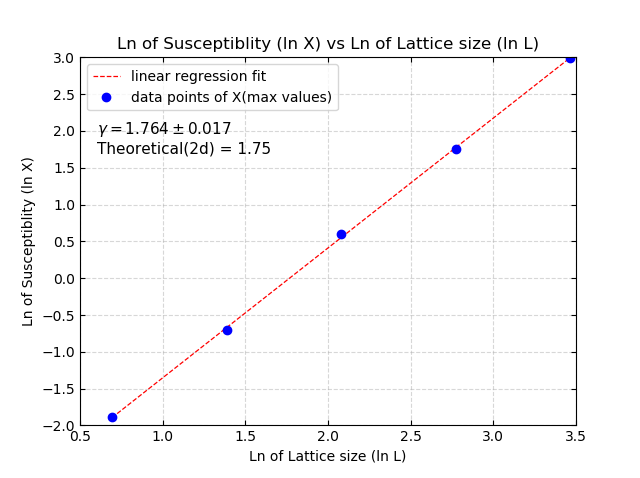

### Procedure for finding $\beta$

 - The magnetisation curve that we had already obtained earlier was "Differentiated" using diff function from numpy.
 - The minima points of this differentiated curve corresponds to the inflection points of the original magnetisation curve.
 - So, T values for those minima points(2.3, 2.4 and 2.6) were taken and the same T values were used in the original graph to find the Magnetisation values of those corresponding found T values. These Magnetisation values are the points of inflection from the orginal graph.
 - Now, Ln-Ln plot was done and the value of $\beta$ was found.

### Code for finding $\beta$ as explained above.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats #for linear regression
#from matplotlib import rc # for using greek letters and symbols
# Loading all the csv files into pandas dataframe
df2 = pd.read_csv(r"L2",delimiter='\t')
df4 = pd.read_csv(r"L4",delimiter='\t')
df8 = pd.read_csv(r"L8",delimiter='\t')
df16 = pd.read_csv(r"L16",delimiter='\t')
df32 = pd.read_csv(r"L32",delimiter='\t')


# Original graph of Magnetization
# Plotting Absolute Magnetization per spin (<|M|>/N) vs Temperature (T)
plt.figure(figsize=(14,6))

#Differentiating the original graph
from numpy import diff
dx=diff(df2['T']) #temperature difference

dy2 = diff(df2['Mabs_avg'])/dx
dy4 = diff(df4['Mabs_avg'])/dx
dy8 = diff(df8['Mabs_avg'])/dx
dy16 = diff(df16['Mabs_avg'])/dx
dy32 = diff(df32['Mabs_avg'])/dx

#Differentiated graph
plt.subplot(1,2,1)

plt.plot(df2['T'][:-1],dy2,'+--',markersize=5,label='L=2')
plt.plot(df4['T'][:-1],dy4,'x--',lw=0.8,markersize=5,label='L=4')
plt.plot(df8['T'][:-1],dy8,'^--',lw=0.7,markersize=4,label='L=8')
plt.plot(df16['T'][:-1],dy16,'s--',lw=0.6,markersize=4, markerfacecolor='None',label='L=16')
plt.plot(df32['T'][:-1],dy32,'o--',lw=0.6,markersize=4, markerfacecolor='None',label='L=32')
all_lists = np.concatenate([df2["Mabs_avg"],df4["Mabs_avg"],df8["Mabs_avg"],df16["Mabs_avg"],df32["Mabs_avg"]])
plt.text(2.6,0.3,'2.6',size=12,c='r')
plt.text(2.4,np.min(all_lists),'2.4',size=12,c='r')
plt.text(2.1,np.min(all_lists),'2.3',size=12,c='r')

plt.xticks(np.arange(0.5, 5+0.5, step=0.5))
plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5)
plt.legend(loc="best")
plt.xlim([np.min(df2['T']),np.max(df2['T'])])
plt.xlabel("Temperature (T)")
plt.ylabel("Absolute Magnetization\n (<|M|>/N)")

T_max=[]
for df,dy in zip([df2,df4,df8,df16,df32],[dy2,dy4,dy8,dy16,dy32]):
    T_max.append(df['T'][np.argmin(dy)])

for Tval in T_max:
    plt.axvline(x=Tval,c='r',linestyle='--',lw=0.9)
plt.title("Plot of differentiated Mabs_avg versus T. \nMinimum values of M corresponds to inflection in the original curves.",size='11')    


#Ln of Magnetisation (ln M) vs Ln of Lattice size (ln L)
Mabs_maxvalues = []
for df,Tval in zip([df2,df4,df8,df16,df32],T_max):
    Mabs_maxvalues.append(df.loc[df['T'] == Tval, 'Mabs_avg'].iloc[0])
Mabs_maxvalues = np.array(Mabs_maxvalues)
Ln_Mabs = np.log(Mabs_maxvalues) 
Ln_L = np.log([2,4,8,16,32]) 

# Doing linear regression to find slope which is nothing but the gradient, which gives us critical exponent
slope, intercept, r_value, p_value, std_err = stats.linregress(Ln_L, Ln_Mabs)

#Fitting using linear regression
plt.subplot(1,2,2)

plt.plot(Ln_L, intercept + slope*Ln_L, 'r--',lw=0.9, label='linear regression fit')

#plot the original data
plt.plot(Ln_L,Ln_Mabs,'o',c='b',label='data points of |M|')
plt.text(2.1,-0.24,r'$\beta = %.3f \pm %.3f $'%(-slope,std_err)+'\nTheoretical(2d):%.3f'%0.125,size='14')
plt.xticks(np.round(np.arange(0.5,3.5+0.5,0.5),2))
plt.yticks(np.round(np.arange(-0.70,-0.10+0.05,0.05),2))
plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5)
plt.xlim([0.5,3.5])
plt.ylim([-0.70,-0.10])
plt.legend(loc="best")
plt.ylabel('Ln of Absolute Magnetization (ln|M|)')
plt.xlabel('Ln of Lattice size (ln L)')
plt.title('Magnetization values found from inflection T points of various lattice.\nLn of Absolute Magnetization (ln|M|) vs Ln of Lattice size (ln L)',size='11')
#plt.tight_layout()
plt.show()


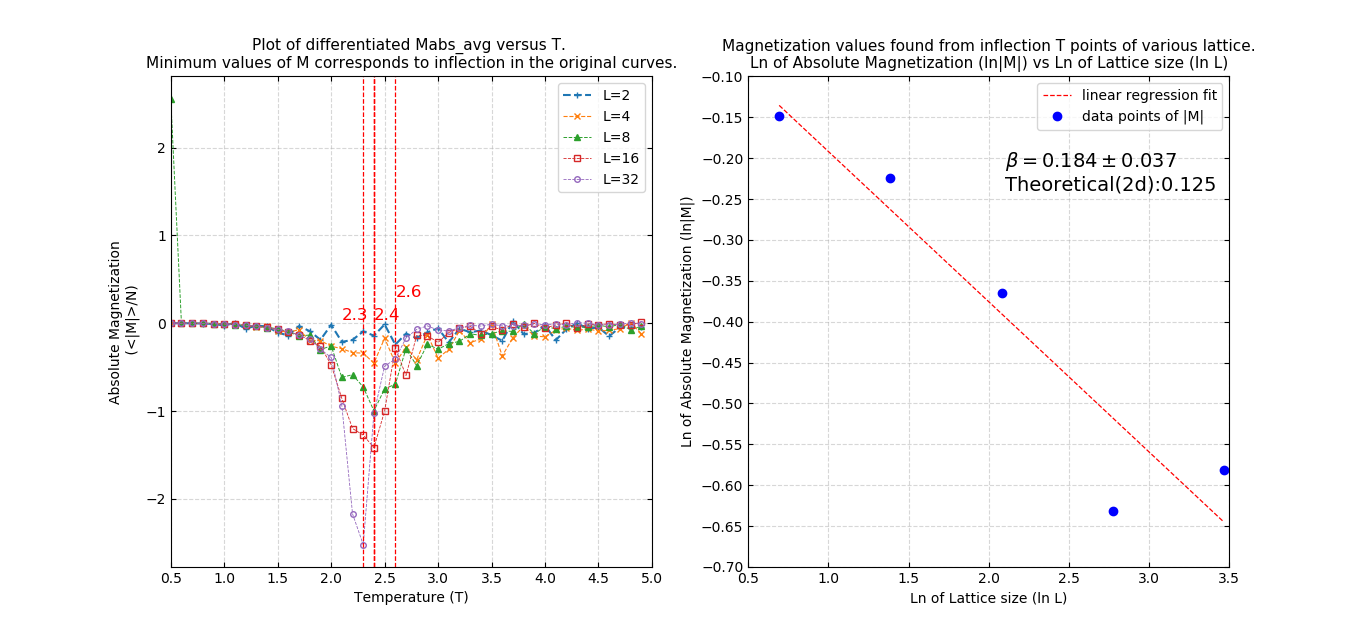

### Plotting Ln of Heat capacity (ln C) vs Ln of Lattice size (ln L) and finding gradient aka the critical exponent $\alpha$ using linear regression

In [ ]:
#Ln of Heat capacity (ln C) vs Ln of Lattice size (ln L)
C_maxvalues = []
for df in [df2,df4,df8,df16,df32]:
    C_maxvalues.append(df['C'].max())
C_maxvalues = np.array(C_maxvalues)
Ln_C = np.log(C_maxvalues) 
Ln_L = np.log([2,4,8,16,32]) 

# Doing linear regression to find slope which is nothing but the gradient, which gives us critical exponent
slope, intercept, r_value, p_value, std_err = stats.linregress(Ln_L, Ln_C)

#Fitting using linear regression
plt.plot(Ln_L, intercept + slope*Ln_L, 'r--',lw=0.9, label='linear regression fit')

#plot the original data
plt.plot(Ln_L,Ln_C,'o',c='b',label='data points of C(max values)')
plt.text(0.6,0.3,r'$\alpha = %.3f \pm %.3f $'%(slope,std_err)+"\nTheoretical(2d)=0.0",size='11')

plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5)
plt.xlim([0.5,3.5])
plt.legend(loc="best")
plt.ylabel('Heat capacity, Ln C')
plt.xlabel('Ln of Lattice size (ln L)')
plt.title('Heat capacity Ln C vs Ln of Lattice size (ln L)')

plt.show()


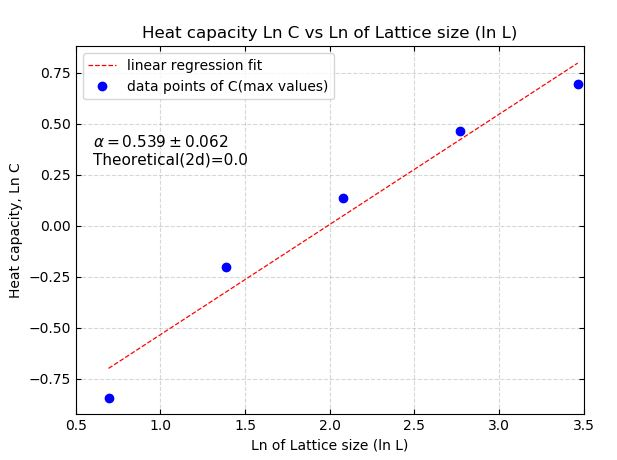

### Combined plots of the above graphs and Alternative plot for finding the exponent for Heat capacity

Here we are not calculating $\alpha$ but instead $C_0$ in  $C = C_0 ln L$. The graph points for the heat capacity isn’t a straight line as seen in the above graph and shows a curvature. The reason is that $\alpha$ is zero in the two dimensional Ising model and should rather be interpreted as $C = C_0 ln L$.

In [ ]:
#Combined plots

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
X_maxvalues = []
for df in [df2,df4,df8,df16,df32]:
    X_maxvalues.append(df['X_prime'].max())
X_maxvalues = np.array(X_maxvalues)
Ln_X = np.log(X_maxvalues) #Ln of Susceptiblity (ln X) max values only
Ln_L = np.log([2,4,8,16,32]) #Ln of Lattice size (ln L)

# Doing linear regression to find slope which is nothing but the gradient, which gives us critical exponent
slope, intercept, r_value, p_value, std_err = stats.linregress(Ln_L, Ln_X)

#Fitting using linear regression
plt.plot(Ln_L, intercept + slope*Ln_L, 'r--',lw=0.9, label='linear regression fit')

#plot the original data
plt.plot(Ln_L,Ln_X,'o',c='b',label='data points of X(max values)')

# Create empty plot with blank marker containing the extra label
plt.text(0.6,1.7,r'$\gamma = %.3f \pm %.3f$'%(slope,std_err)+'\nTheoretical(2d) = 1.75',size='13')
plt.xticks(np.round(np.arange(0.5,3.5+0.5,0.5),2))
plt.yticks(np.round(np.arange(-2,3+0.5,0.5),2))
plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5)
plt.xlim([0.5,3.5])
plt.ylim([-2,3])
plt.legend(loc="best")
plt.ylabel('Ln of Susceptiblity (ln X)')
plt.xlabel('Ln of Lattice size (ln L)')
plt.title('Ln of Susceptiblity (ln X) vs Ln of Lattice size (ln L)')

plt.subplot(1,2,2)
C_maxvalues = []
for df in [df2,df4,df8,df16,df32]:
    C_maxvalues.append(df['C'].max())
C_maxvalues = np.array(C_maxvalues)
Ln_C = np.log(C_maxvalues) 
Ln_L = np.log([2,4,8,16,32]) 

# Doing linear regression to find slope which is nothing but the gradient, which gives us critical exponent
slope, intercept, r_value, p_value, std_err = stats.linregress(Ln_L, C_maxvalues)

#Fitting using linear regression
plt.plot(Ln_L, intercept + slope*Ln_L, 'r--',lw=0.9, label='linear regression fit')

#plot the original data
plt.plot(Ln_L,C_maxvalues,'o',c='b',label='data points of C(max values)')
plt.text(0.6,1.55,"C=C0 x LnL\n"+r'$C0 = %.3f \pm %.3f $'%(slope,std_err)+"\nTheoretical(2d)=0.500",size='13')
plt.xticks(np.round(np.arange(0.5,3.5+0.5,0.5),2))
plt.yticks(np.round(np.arange(-0.4,2+0.2,0.2),2))
plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5)
plt.xlim([0.5,3.5])
plt.ylim([0.4,2])
plt.legend(loc="best")
plt.ylabel('Heat capacity, C')
plt.xlabel('Ln of Lattice size (ln L)')
plt.title('Heat capacity, C vs Ln of Lattice size (ln L)')
plt.suptitle('Critical exponents for Susceptibility and Heat Capacity')
plt.show()


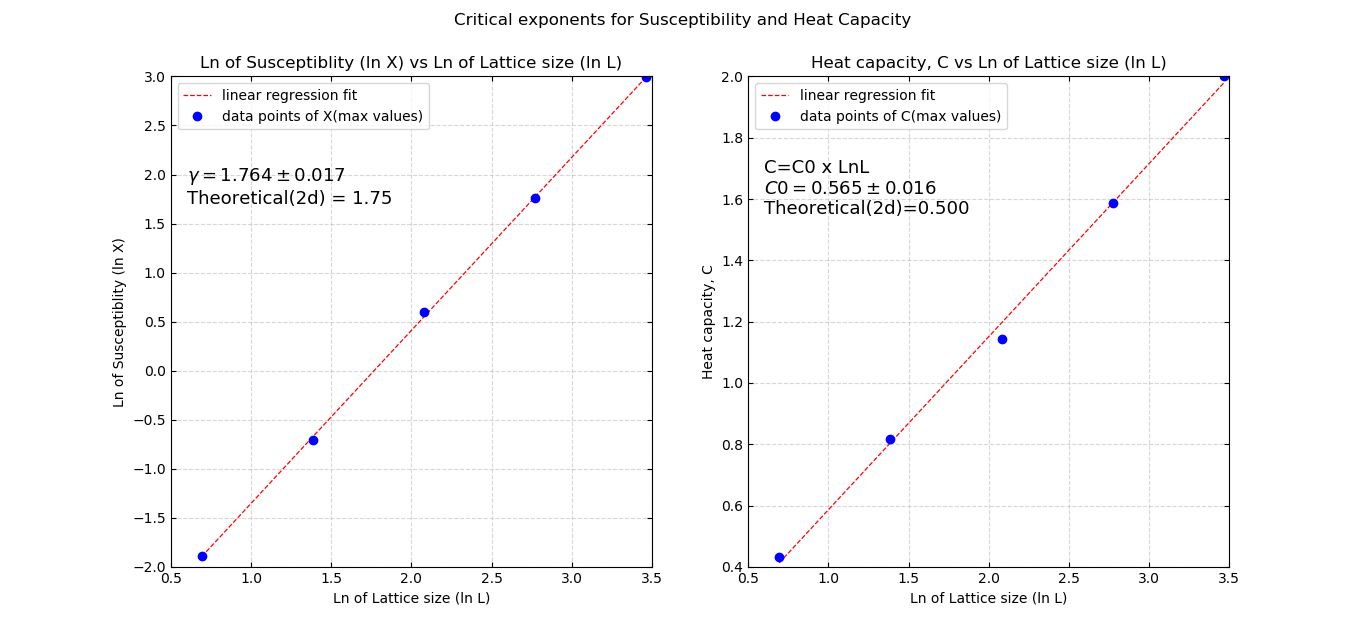

## Reduced Plot of the observables:

To verify the validity of the correctness of the critical exponents found in the theory we do the reduced unit plots for observables like $\chi$, $|M|$ and $C$. The critical exponents are $\alpha = 0$, $\beta = 0.125$ and $\gamma = 1.75$. Now, we plot the scaled observables vs reduced temperature and check how valid is our simulation so that the critical exponents of the theory makes the data to collapse on a single curve.

The following plots were done:

Scaled Susceptibility per spin versus reduced temperature
## $ L^\frac{-\gamma}{\nu} \chi$ versus $L^\frac{1}{\nu} t $

Scaled Absolute Magnetisation per spin versus reduced temperature
## $ L^\frac{\beta}{\nu} |M|$ versus $L^\frac{1}{\nu} t $

Scaled Heat capacity per spin versus reduced temperature
## $ L^\frac{-\alpha}{\nu} C$ versus $L^\frac{1}{\nu} t $

The reduced temperature is given by: 
## $t = \frac{T-T_c}{T_c}$


In [ ]:
# COLLAPSE OF DATA/ REDUCED PLOTS
# Collect the data
# Collapse of data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading all the csv files into pandas dataframe
df2 = pd.read_csv(r"L2",delimiter='\t')
df4 = pd.read_csv(r"L4",delimiter='\t')
df8 = pd.read_csv(r"L8",delimiter='\t')
df16 = pd.read_csv(r"L16",delimiter='\t')
df32 = pd.read_csv(r"L32",delimiter='\t')


### Reduced unit plot of Magnetic susceptibility $\chi$ versus reduced temperature, t

In [ ]:
# Scaled Susceptibility, Reduced unit plot
# X_scaled = l^(gamma/mu) * X(t)   versus L(-1/mu)
gamma = 1.75
alpha = 0.5
beta = 0.125
mu = 1
Tc = 2.269
# creating a df for including all the reduced data 
reduced_df = pd.DataFrame({'T':df2['T']}) 
#calculating reduced temperature according to the formula given in above text
reduced_df['t'] = (reduced_df['T']-2.269)/2.269

#Calculating reduced X' for each of the lattice sizes and storing them as pandas dataframe
for df,L in zip([df2,df4,df8,df16,df32],[2,4,8,16,32]):
    reduced_df['reduced_X'+str(L)] = (L**(-gamma/mu))*df['X_prime']     
    reduced_df['t'+str(L)] = reduced_df['t']*L**(1/mu)    
#print(reduced_df)

# Plotting all the reduced X' vs reduced temperature
plt.figure()
plt.plot(reduced_df['t2'],reduced_df['reduced_X2'],'+',markersize=6,label='L=2')
plt.plot(reduced_df['t4'],reduced_df['reduced_X4'],'x',markersize=6,label='L=4')
plt.plot(reduced_df['t8'],reduced_df['reduced_X8'],'^',markersize=6,markerfacecolor='None',label='L=8')
plt.plot(reduced_df['t16'],reduced_df['reduced_X16'],'s',markersize=6, markerfacecolor='None',label='L=16')
plt.plot(reduced_df['t32'],reduced_df['reduced_X32'],'o',markersize=6,label='L=32')
plt.axvline(x=0,c='r',linestyle='--')
all_lists = np.concatenate([df2["Mabs_avg"],df4["Mabs_avg"],df8["Mabs_avg"],df16["Mabs_avg"],df32["Mabs_avg"]])
plt.text(0,0,'t=0',size=14,c='r',weight='bold')

plt.text(20,0.04,r'$\gamma = 1.75$'+'\n'+r'$\nu = 1$',size=14,weight='bold')

plt.xticks(np.arange(-25,40+5, step=5))
plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5)
plt.legend(loc="best",prop={'size':14.5})
plt.xlim(-25,40)
plt.ylim([-0.002,0.05])
plt.title("Reduced unit plot of Magnetic susceptibility versus reduced temperature\n"+r"$ L^\frac{-\gamma}{\nu} \chi$"+'  versus  '+r"$L^\frac{1}{\nu} t $",size=14)     
plt.xlabel("Reduced Temperature,  "+r"$L^\frac{1}{\nu} t $",size=14)
plt.ylabel("Reduced Susceptibility,  "+r"$ L^\frac{-\gamma}{\nu} \chi$",size=14)
plt.show()


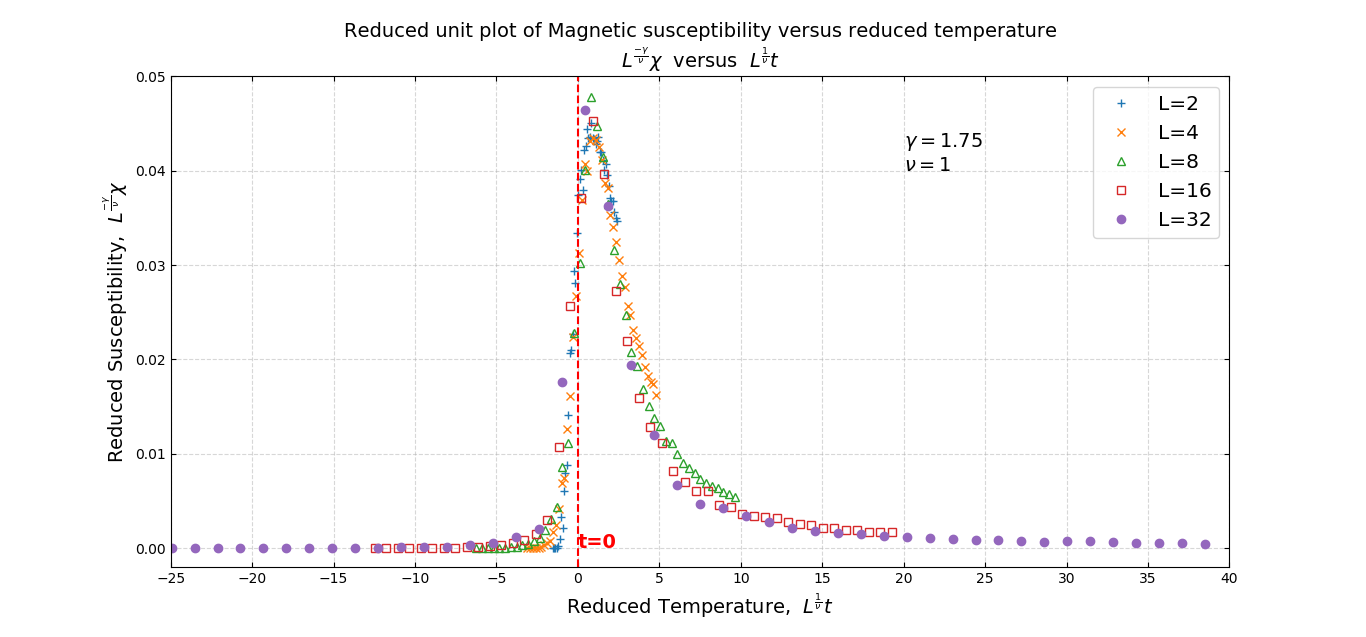
Data collapse of magnetic susceptibility data for the two dimensional Ising model. The points are taken from Monte Carlo measurements of the susceptibility for five different sizes of system as indicated with the critical exponent $\gamma = 1.75$ 

### Reduced unit plot of Absolute Magnetization, |M| versus reduced temperature.

In [ ]:
# Reduced unit plot of Absolute Magnetization versus reduced temperature
beta = 0.125

# Calculating reduced |M| for each of the lattice sizes and storing them as pandas dataframe
for df,L in zip([df2,df4,df8,df16,df32],[2,4,8,16,32]):
    reduced_df['reduced_Mabs_avg'+str(L)] = (L**(beta/mu))*df['Mabs_avg']     
    reduced_df['t'+str(L)] = reduced_df['t']*L**(1/mu)    
    
# Plotting all the reduced |M| vs reduced temperature
plt.figure()
plt.plot(reduced_df['t2'],reduced_df['reduced_Mabs_avg2'],'+',markersize=6,label='L=2')
plt.plot(reduced_df['t4'],reduced_df['reduced_Mabs_avg4'],'x',markersize=6,label='L=4')
plt.plot(reduced_df['t8'],reduced_df['reduced_Mabs_avg8'],'^',markersize=6,markerfacecolor='None',label='L=8')
plt.plot(reduced_df['t16'],reduced_df['reduced_Mabs_avg16'],'s',markersize=6, markerfacecolor='None',label='L=16')
plt.plot(reduced_df['t32'],reduced_df['reduced_Mabs_avg32'],'o',markersize=6,label='L=32')


plt.axvline(x=0,c='r',linestyle='--')
plt.text(0,0,'t=0',size=14,c='r',weight='bold')

plt.text(24,1.2,r'$\beta = 0.125$'+'\n'+r'$\nu = 1$',size=14,weight='bold')

plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5)
plt.legend(loc="best",prop={'size':14.5})
plt.xlim(-30,40)
plt.ylim([0.0,1.6])
plt.title("Reduced unit plot of Absolute Magnetization versus reduced temperature\n"+r"$ L^\frac{\beta}{\nu} |M|$"+'  versus  '+r"$L^\frac{1}{\nu} t $",size=14)     
plt.xlabel("Reduced Temperature,  "+r"$L^\frac{1}{\nu} t $",size=14)
plt.ylabel("Reduced Absolute Magnetization,  "+r"$ L^\frac{\beta}{\nu} |M|$",size=14)
plt.show()



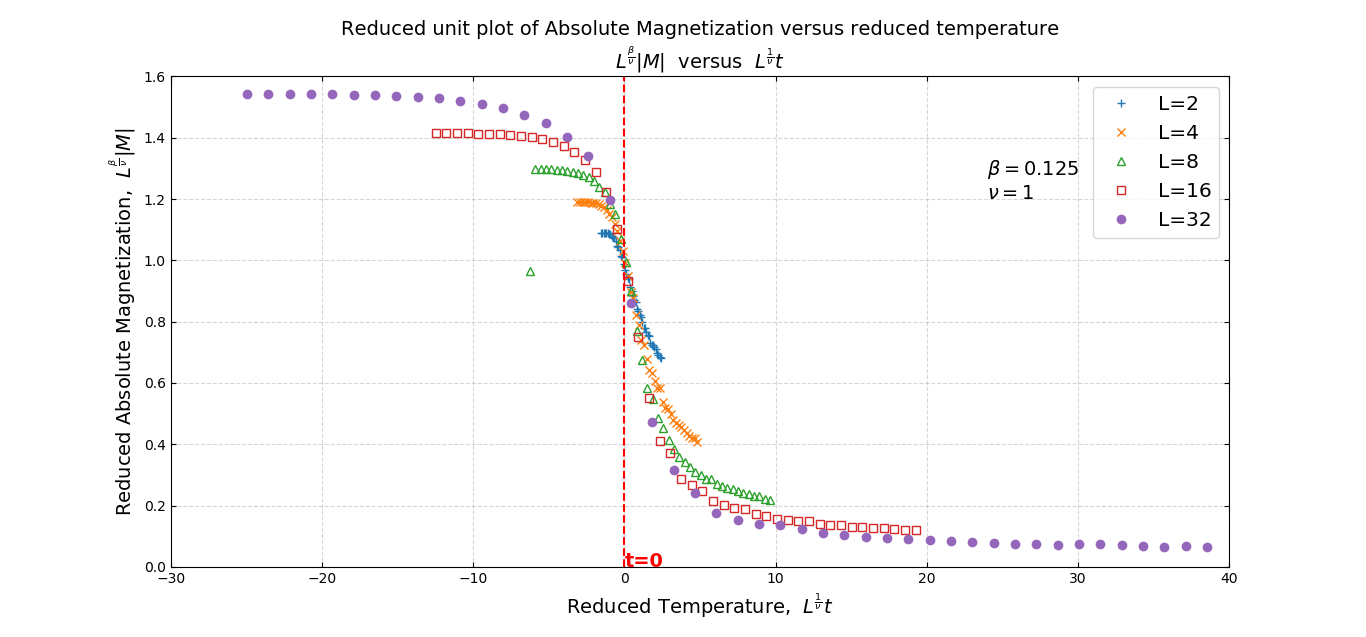
Data collapse of Magneitzation data for the two dimensional Ising model. The points are taken from Monte Carlo measurements of the susceptibility for five different sizes of system as indicated with the critical exponent $\beta = 0.125$ 

### Reduced unit plot of Heat Capacity, C versus reduced temperature, t.

In [ ]:
alpha = 0
mu = 1
Tc = 2.269
reduced_df = pd.DataFrame({'T':df2['T']}) 
reduced_df['t'] = (reduced_df['T']-2.269)/2.269

# Calculating reduced C for each of the lattice sizes and storing them as pandas dataframe
for df,L in zip([df2,df4,df8,df16,df32],[2,4,8,16,32]):
    reduced_df['reduced_C'+str(L)] = (L**(-alpha/mu))*(df['C'])     
    reduced_df['t'+str(L)] = reduced_df['t']*L**(1/mu)    


# Plotting all the reduced |M| vs reduced temperature
plt.figure()
plt.plot(reduced_df['t2'],reduced_df['reduced_C2'],'+',markersize=6,label='L=2')
plt.plot(reduced_df['t4'],reduced_df['reduced_C4'],'x',markersize=6,label='L=4')
plt.plot(reduced_df['t8'],reduced_df['reduced_C8'],'^',markersize=6,markerfacecolor='None',label='L=8')
plt.plot(reduced_df['t16'],reduced_df['reduced_C16'],'s',markersize=6, markerfacecolor='None',label='L=16')
plt.plot(reduced_df['t32'],reduced_df['reduced_C32'],'o',markersize=6,label='L=32')

plt.axvline(x=0,c='r',linestyle='--')
plt.text(0,0,'t=0',size=14,c='r',weight='bold')

plt.text(25,1.75,r'$\alpha = 0$'+'\n'+r'$\nu = 1$',size=14,weight='bold')

plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5)
plt.legend(loc="best",prop={'size':14.5})
plt.xlim(-30,40)
plt.title("Reduced unit plot of Heat Capacity versus reduced temperature\n"+r"$ L^\frac{-\alpha}{\nu} C$"+'  versus  '+r"$L^\frac{1}{\nu} t $",size=14)     
plt.xlabel("Reduced Temperature,  "+r"$L^\frac{1}{\nu} t $",size=14)
plt.ylabel("Reduced Heat capacity,  "+r"$ L^\frac{-\alpha}{\nu} C$",size=14)
plt.show()


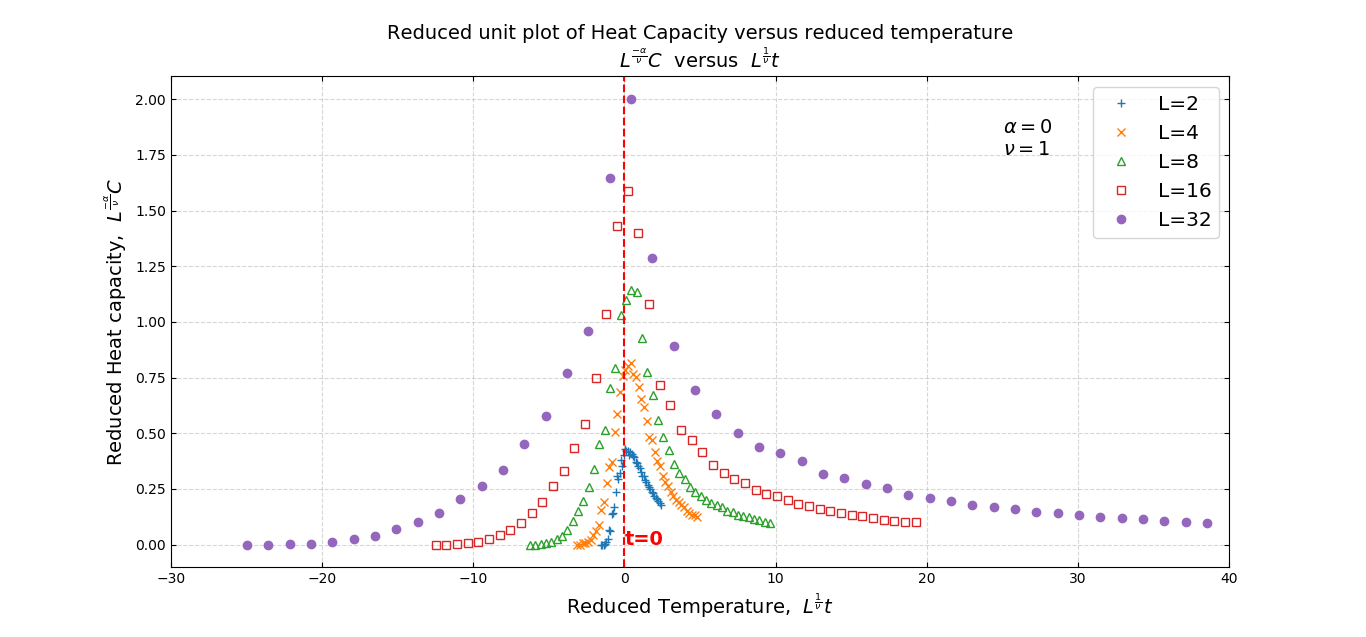
We see from the plot that with $\alpha = 0$, the data hasn't collapsed properly. So, we tried to see what happens if we use the alpha that we found in the simulation i.e. $\alpha=0.539$. The below code gives us the required comparison which is quite strange though not unexpected since we are trying to study Ising model with finite size lattices.

### Comparing with different alphas, i.e. the one from theory $\alpha=0$ and one found in the simulation experiment $\alpha=0.539$

In [ ]:
# Comapring with different alphas, i.e. the one from theory alpha=0 and one found in the simulation experiment alpha=0.539

# case 1: alpha=0.539
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
alpha = 0.539
mu = 1
Tc = 2.269
reduced_df = pd.DataFrame({'T':df2['T']}) 
reduced_df['t'] = (reduced_df['T']-2.269)/2.269

for df,L in zip([df2,df4,df8,df16,df32],[2,4,8,16,32]):
    reduced_df['reduced_C'+str(L)] = (L**(-alpha/mu))*(df['C'])     
    reduced_df['t'+str(L)] = reduced_df['t']*L**(1/mu)    

plt.plot(reduced_df['t2'],reduced_df['reduced_C2'],'+',markersize=6,label='L=2')
plt.plot(reduced_df['t4'],reduced_df['reduced_C4'],'x',markersize=6,label='L=4')
plt.plot(reduced_df['t8'],reduced_df['reduced_C8'],'^',markersize=6,markerfacecolor='None',label='L=8')
plt.plot(reduced_df['t16'],reduced_df['reduced_C16'],'s',markersize=6, markerfacecolor='None',label='L=16')
plt.plot(reduced_df['t32'],reduced_df['reduced_C32'],'o',markersize=6,label='L=32')


plt.axvline(x=0,c='r',linestyle='--')
plt.text(0,0,'t=0',size=14,c='r',weight='bold')

plt.text(14,0.23,r'$\alpha = 0.539(simulation)$'+'\n'+r'$\nu = 1$',size=12,weight='bold')

plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5)
plt.legend(loc="best",prop={'size':14.5})
plt.xlim(-30,40)
plt.title("Reduced unit plot of Heat Capacity versus reduced temperature\n"+r"$ L^\frac{-\alpha}{\nu} C$"+'  versus  '+r"$L^\frac{1}{\nu} t $",size=11)     
plt.xlabel("Reduced Temperature,  "+r"$L^\frac{1}{\nu} t $",size=11)
plt.ylabel("Reduced Heat capacity,  "+r"$ L^\frac{-\alpha}{\nu} C$",size=11)

# case 2: alpha = 0
plt.subplot(1,2,2)
alpha = 0
mu = 1
Tc = 2.269
reduced_df = pd.DataFrame({'T':df2['T']}) 
reduced_df['t'] = (reduced_df['T']-2.269)/2.269

for df,L in zip([df2,df4,df8,df16,df32],[2,4,8,16,32]):
    reduced_df['reduced_C'+str(L)] = (L**(-alpha/mu))*(df['C'])     
    reduced_df['t'+str(L)] = reduced_df['t']*L**(1/mu)    

plt.plot(reduced_df['t2'],reduced_df['reduced_C2'],'+',markersize=6,label='L=2')
plt.plot(reduced_df['t4'],reduced_df['reduced_C4'],'x',markersize=6,label='L=4')
plt.plot(reduced_df['t8'],reduced_df['reduced_C8'],'^',markersize=6,markerfacecolor='None',label='L=8')
plt.plot(reduced_df['t16'],reduced_df['reduced_C16'],'s',markersize=6, markerfacecolor='None',label='L=16')
plt.plot(reduced_df['t32'],reduced_df['reduced_C32'],'o',markersize=6,label='L=32')


plt.axvline(x=0,c='r',linestyle='--')
plt.text(0,0,'t=0',size=14,c='r',weight='bold')

plt.text(18,1.20,r'$\alpha = 0(theoretical)$'+'\n'+r'$\nu = 1$',size=13,weight='bold')

plt.tick_params(direction='in',bottom=True,top=True,left=True,right=True)
plt.grid(linestyle='--',alpha=0.5)
plt.legend(loc="best",prop={'size':14.5})
plt.xlim(-30,40)
plt.title("Reduced unit plot of Heat Capacity versus reduced temperature\n"+r"$ L^\frac{-\alpha}{\nu} C$"+'  versus  '+r"$L^\frac{1}{\nu} t $",size=11)     
plt.xlabel("Reduced Temperature,  "+r"$L^\frac{1}{\nu} t $",size=11)
plt.ylabel("Reduced Heat capacity,  "+r"$ L^\frac{-\alpha}{\nu} C$",size=11)
plt.ylabel("     ",size=14)
plt.subplots_adjust(wspace=0.1)
#plt.tight_layout()
plt.show()


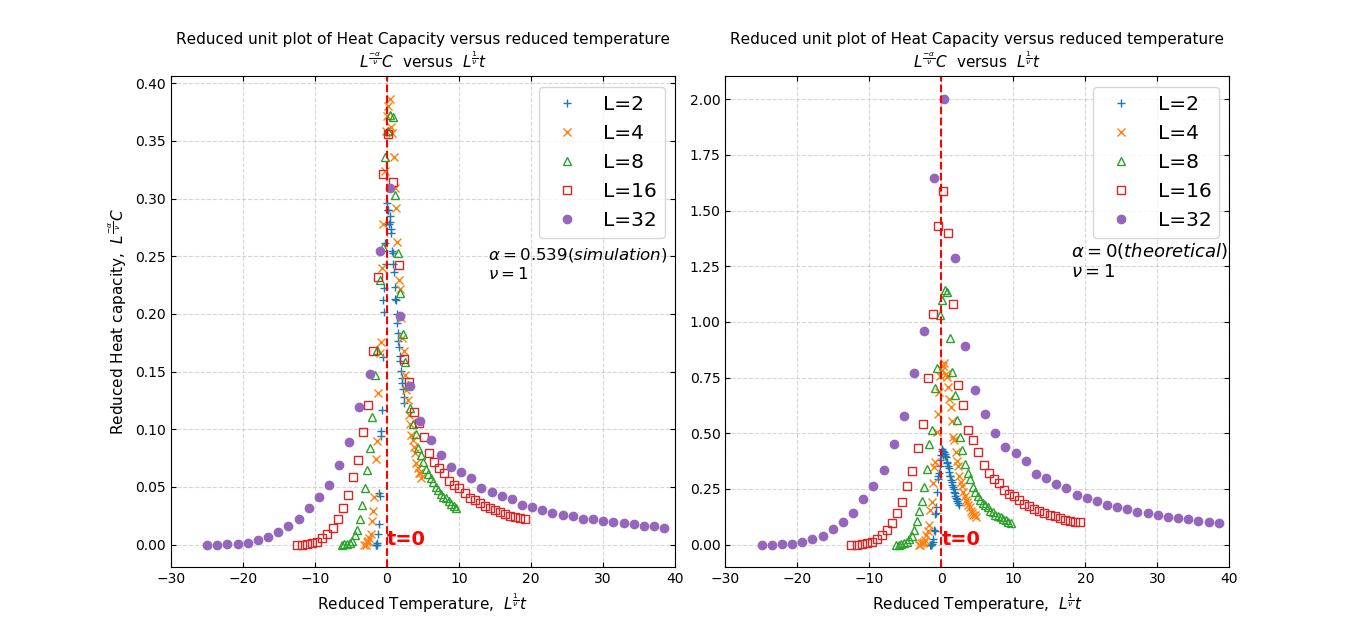
From these 2 plots, we see that for $\alpha=0.539$ we see a better collapse of data and better reduced plot as compared to $\alpha=0$ which is a little deviant from the theory. But our thoughts to this deviating behaviour is because as the value of $\alpha$ is 0, and also the plot of LnC vs LnL has a curve instead of a straight line, we get this anomalous behaviour. This could have been easily solved if we take large lattice lengths and hence more number of data points to plot LnC vs LnL curve.

## Probability Distribution of the Magnetization per spin

Here we try to estimate the distribution of the magnetization for three different temperature: 
- $T < T_c$, 
- $T = T_c$, 
- $T > T_c$.

In finitesize systems, the magnetization _m_ is a fluctuating quantity, characterized by the probability distribution $P(m)$. In
Ising-like models undergoing a second-order phase transition it is known that at temperatures $T <= T_c$ the distribution $P(m)$ shows a double peak centered at the spontaneous magnetizations +_sm_ and −_sm_ , while at temperatures greater than $T_c$, $P(m)$ has a single peak at zero magnetization.
The probability distribution $P(m)$ corresponds to the fraction of the total number of realizations in which the system magnetization is _m_:
$$ P(m) = \frac{N_m} {N_{mcs}} $$
where $N_m$ is the number of times that magnetization m appears and $N_{mcs}$ s the total number of Monte Carlo steps. 
Analogously to the usual finite-size scaling assumption, one then expects that, for a large finite system of linear dimension L at the critical point, $P(m)$ takes the form $ P(m) = b \cdot P^*(\tilde{m}) $, where b = $ b_0\cdot L^{ \frac{\beta}{\nu}}$, $\beta$ and $\nu$ are the critical exponents, $\tilde{m} = b \cdot m$, $b_0$ is a constant, and $P^*(\tilde{m})$ is a universal scaling function, normalized to unit norm and unit variance.

We have performed extensive Monte Carlo simulations on square L×L for L = {4, 8, 16, 32}.
We have fixed the $3\cdot L$ temperature values in order to have similar distributions for the different lattice sizes. Since one expects that the difference $|T_L−T_c|$ scales as $L^{\frac{−1}{\nu}}$, where $\nu$ is the correlation length critical exponent, we have choose T as a function of L according to this relation.

In [ ]:
from scipy import optimize

@jit(nopython=True)
def gauss(x,mu,sigma,A):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

def sort_by_key(d):
    return sorted(d, key=d.get)

def sort_by_item(d):
    return sorted(d.items())

b0=1
nu=1
beta=0.125
#dictionary of sizes with their respective Tc based on the theorycal prediction
Sizes={4: 2.8, 8: 2.5, 16: 2.4, 32: 2.3}
 # number of Monte Carlo steps
transient=1000 

fig, axs  = plt.subplots(figsize=(9,25),nrows=4, ncols=1)
for size in Sizes.keys():
    lat=np.random.randint(2, size=(size, size))*2 - 1
    mcs=2*int(1e4)
    Tc=Sizes[size]
    n=size*size                   
    scaling_factor=size**(-1/nu)
    b=b0*size**(beta/nu)
    M = 0.0
    de = 0.0
    yf=[]
    xf=[]
    mm=[]
    
    #lattice initialization
    #list of the 3 temperatures
    T_list=[Tc-scaling_factor*1.5, Tc, Tc+scaling_factor*5] 
    for T in T_list:
        
        m_list=[]
        #transient function
        transient_results(lat,transient)
        # observables adopt equilibriated lattice configuration values
        M=total_magnetization(lat)
        E=total_energy(lat)
        
        # Monte Carlo loop
        for a in range(mcs):
            # Metropolis loop
            for j in range(n):
                pos_x, pos_y = choose_random_pos_lat()    
                if test_flip(pos_x,pos_y,lat)==True:
                    flip(pos_x,pos_y,lat)
                    M+=2*lat[pos_x][pos_y]
                    E+=2*de
            m_list.append(M/n) #list of <m>
        
        # probability calculation 
        
        p = dict((l*b, m_list.count(l)/(mcs*b) ) for l in set(m_list))
        #sorted by frequencies 
        c = sort_by_item(p)
        x, y = zip(*c) # unpack the list of pairs into two tuples
        x_n, y_n = list(x), list(y) #convert into lists
        yf.append(y_n)
        xf.append(x_n)
        #save the minimum and the two maximum values 
        mm.append([sort_by_key(p)[0], sort_by_key(p)[-1], sort_by_key(p)[-2]])
    
    i=int(math.log2(int(size))-2)
    #distribution plots
    axs[i].plot(xf[0], yf[0], '-', markersize=5,label=('T=%.2f' %T_list[0]), c='b')
    axs[i].plot(xf[1], yf[1], '-', markersize=5,label=('T=Tc'), c='orange')
    axs[i].plot(xf[-1], yf[-1], '-', markersize=5,label=('T=%.2f' %T_list[-1]), c='r')
    axs[i].set_title('L = ' + str(size))
    axs[i].set_ylabel(r'$P^i$'+ r'$(\tilde{m}$)')
    axs[i].legend(fancybox=True, framealpha=1, shadow=True, borderpad=1)
    l1=axs[i].axvline(x=mm[1][1],c='g',lw=1, linestyle='-.', label='Tc peaks')
    l2=axs[i].axvline(x=mm[1][2],c='g',lw=1, linestyle='-.')
    axs[i].set_xlabel(r'$\tilde{m}$')
    axs[i].grid(linestyle='--',alpha=0.5)
    axs[i].text(mm[1][1],  max(yf[1])/2, 'Max2=%.2f' %mm[1][1], backgroundcolor="white",
            ha='center', color='darkgreen')
    axs[i].text(mm[1][-1], max(yf[1])/2, 'Max1=%.2f' %mm[1][-1], backgroundcolor="white",
            ha='center', color='darkgreen')
    params2,cov2=optimize.curve_fit(gauss,xf[-1],yf[-1], p0=[0,0.75,0.85])
    x=np.linspace(-1,1,100)
    axs[i].plot(x,gauss(x,*params2), color='black', alpha=0.7, ls=':')
    axs[i].legend()
    
    # Converting the above list into pandas dataframe
    df = pd.DataFrame({'m_under': xf[0], 'Pm_Tunder': yf[0],'m_Tc': xf[1], 'Pm_Tc': yf[1],
                       'm_above': xf[2], 'Pm_Tabove': yf[2]})


    # Storing of the data in csv format 
    file_name = "PM"+str(size)
    df.to_csv(file_name, sep='\t',index=False)
    
plt.show()

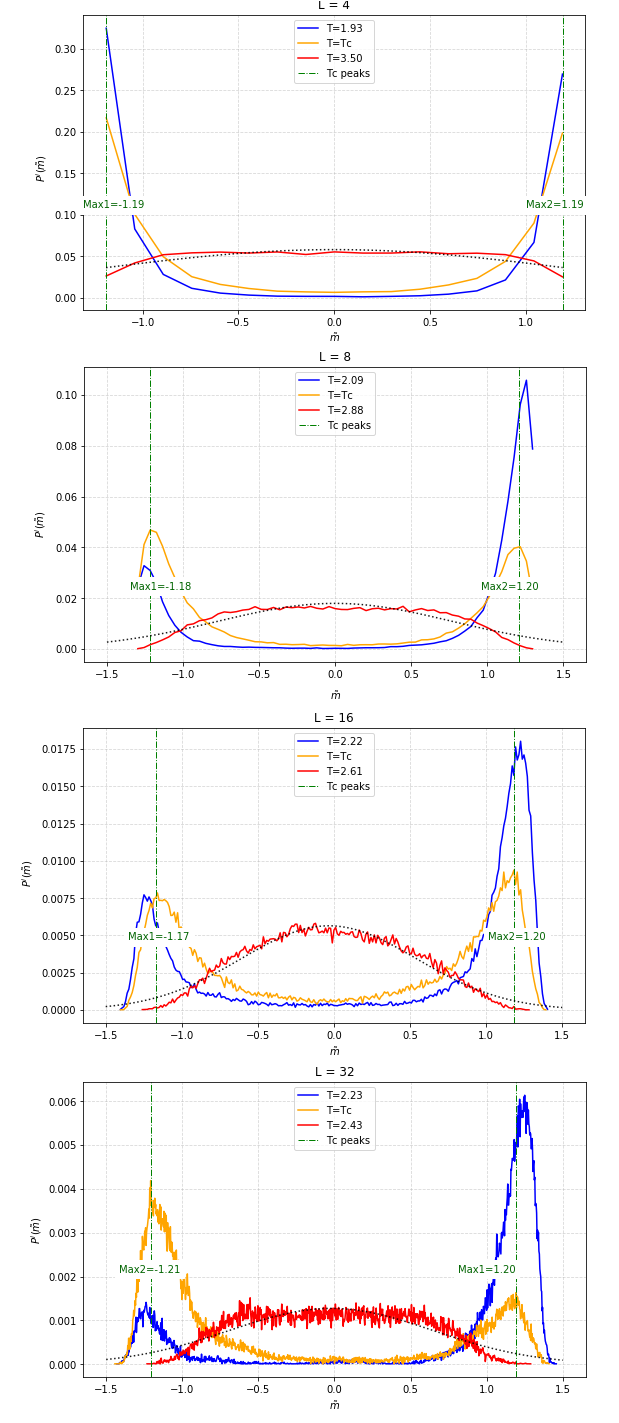

The expected behaviours are visible in all the three plots: it is possible to recognize the double peaked distributions for $T\leq T_c$ and normal distribution with mean $\mu=0$ for $T>T_c$.

As expected, one can see that for a temperature $ T\leq T_c$ the maximum value of $P^*$ decreases when the lattice size L increases but the areas where the peaks are located are the same. The reason of this phenomena is that as the lattice size increases the spontaneous magnetization is less likely to occur.

Since we are dealing with a limited lattice size there is finite probability even for values of <_m_> far from the peaks. We know that this probability is directly proportional to the number of mcs used and inversely proportional to the lattice size and this is compounded by the preiodic boundary conditions used, the plots shows a behaviour that are consistent with this fact:
the valley shown linking the two peaks of the probability dropps for lower temperatures and bigger lattice configurations. 
We expect the configuration to be relatively stable at the peaks but if its magnetization has slipped down (fluctuated) to the center of the valley then it has an equal probability of climbing up either side of the peaks (this is the crux of the spontaneous flipping) and for this reason the distribution should be symmetric. Nevertheless by looking at the results is possible to see that for higher L the plots begin to show asymetrical peaks and the asymmetry is more accentuated for the lowest temperature. This is due to the fact that the system does not have enough time to completely show its spontaneous flipping that in theory has the same probability for each magnetization sign. The plot would be more symmetric increasing the number of Montecarlo because the greater is _mcs_  the more likely we are to introduce spontaneous flipping but that would impy a huge amount of computational time.

## $T_c$ estimation

The transition point can be determined by using the cumulant: 
  
$$ U_L=1-\frac{<M^4>_L}{3 <M^2>_L} $$

The critical point is fixed at $U_L = U_{L′}$ . Thus taking the ratio of different cumulants for different sized lattices, $\frac{U_L}{U_{L′}}$ , we will get an intersection at a particular temperature. This is the desired critical temperature.
The $U_L$ values have already been calculated in the previous section _Measurement variables_.

In [ ]:

#dictionary of sizes with their respective Tc based on the theorycal prediction
S=[4,8,16,32]
 # number of Monte Carlo steps
transient=500 
mcs=int(1e4)
temp=(np.arange(1.80,3.00,0.01))
M_avg_list_tot = [] 
Msq_avg_list_tot = []
Mabs_avg_list_tot = []
Mq_avg_list_tot = []
U_list_tot = []

fig, axs  = plt.subplots(figsize=(9,25),nrows=4, ncols=1)
for size in S:
    M, Msq, Msq_avg, M_avg, mtot, mtotsq = np.float64(0),np.float64(0),np.float64(0),np.float64(0),np.float64(0),np.float64(0)
    U, mfourtot=np.float64(0),np.float64(0)
    U_list = []
    M_avg_list = [] 
    Msq_avg_list = []
    Mfour_avg_list = []
    Mq_avg_list = []
    lat=np.random.randint(2, size=(size, size))*2 - 1
    de = 0.0
    
    for T in temp: 
        #transient function
        transient_results(lat,transient)
        # observables adopt equilibriated lattice configuration values
        M=total_magnetization(lat)
   
        # Monte Carlo loop
        for a in range(mcs):
            # Metropolis loop
            for j in range(n):
                pos_x, pos_y = choose_random_pos_lat()    
                if test_flip(pos_x,pos_y,lat)==True:
                    flip(pos_x,pos_y,lat)
                    M+=2*lat[pos_x][pos_y]
                    
            mtotsq+=(np.int64(M)*np.int64(M))
            mfourtot+=(np.int64(M)*np.int64(M)*np.int64(M)*np.int64(M))

        # probability calculation 
        
        Msq_avg = mtotsq*norm
        Mfour_avg = mfourtot*norm
        U=1-(Mfour_avg/(3*Msq_avg))
        U_list.append(U)
        M_avg_list.append(M_avg) 
        Msq_avg_list.append(Msq_avg)
        Mfour_avg_list.append(Mfour_avg)
        
    U_list_tot.append(U_list) 


In [ ]:
fig, ax  = plt.subplots(figsize=(12,8),nrows=1, ncols=1)
ax.plot(temp, U_list_tot[3]/np.sum(U_list_tot[3]), '-', marker='o', lw=1, markersize=2,label='$U_{32}$')
ax.plot(temp, U_list_tot[2]/np.sum(U_list_tot[2]), '-', marker='o', lw=1,markersize=2,label='$U_{16}$')
ax.plot(temp, U_list_tot[1]/np.sum(U_list_tot[1]), '-', marker='<', lw=1,markersize=2,label='$U_{8}$')
ax.plot(temp, U_list_tot[0]/np.sum(U_list_tot[0]), '-', marker='<', lw=1,markersize=2,label='$U_{4}$')
ax.grid(linestyle='--',alpha=0.5)
ax.set_xlabel('T')
ax.set_ylabel('$U_L$')
ax.set_xlim(1.7,2.9)
ax.set_xticks(np.arange(1.80,2.9,0.1))
ax.set_yticks(np.arange(0.018,0.030,0.001))
plt.legend()
plt.show()

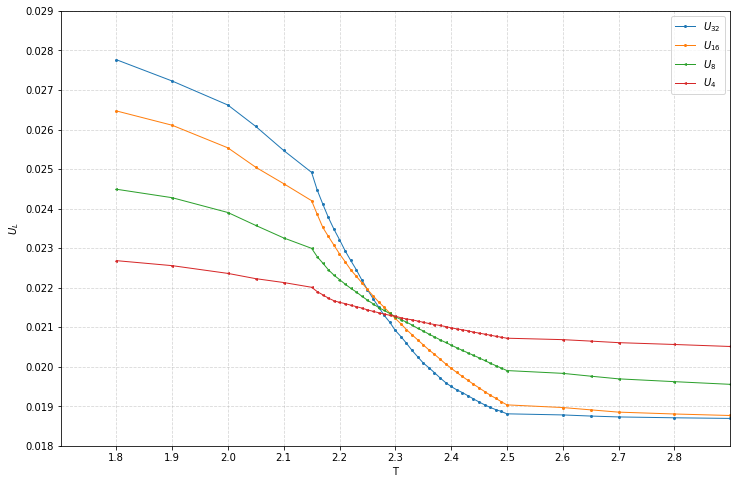

In [ ]:
uu1=[]
uu2=[]
for u32, u4, u16, u8 in zip (U_list_tot[3],U_list_tot[0],U_list_tot[2],U_list_tot[1]):
    uu1.append(u32/u4)
    uu2.append(u16/u8)
tc=temp[0]
d=uu1[0]/abs(np.sum(uu1)), uu2[0]/abs(np.sum(uu2))
for t, u1, u2 in zip (temp, uu1/abs(np.sum(uu1)), uu2/abs(np.sum(uu2))):
    if abs(u1-u2)<d:
        d=abs(u1-u2)
        tc=t
    
fig, ax  = plt.subplots( 1, 1, figsize=(14,8))
ax.plot(temp, uu1/abs(np.sum(uu1)), '-', lw=1, marker='.',markersize=5, label='$U_4/U_{32}$')
ax.plot(temp, uu2/abs(np.sum(uu2)), '-', lw=1, marker='.',markersize=5, label='$U_{16}/U_{8}$')
ax.axvline(x=tc,c='g',lw=1, linestyle='-.', label='estimated Tc='+str(np.round(tc,4)))
ax.grid(linestyle='--',alpha=0.5)
ax.set_xticks(np.arange(1.80,3.00,0.05))
ax.set_xlim(1.85,2.7)
ax.set_xlabel('T')
ax.set_ylabel("$U_L/U_{L'}$")
plt.legend()
plt.show()

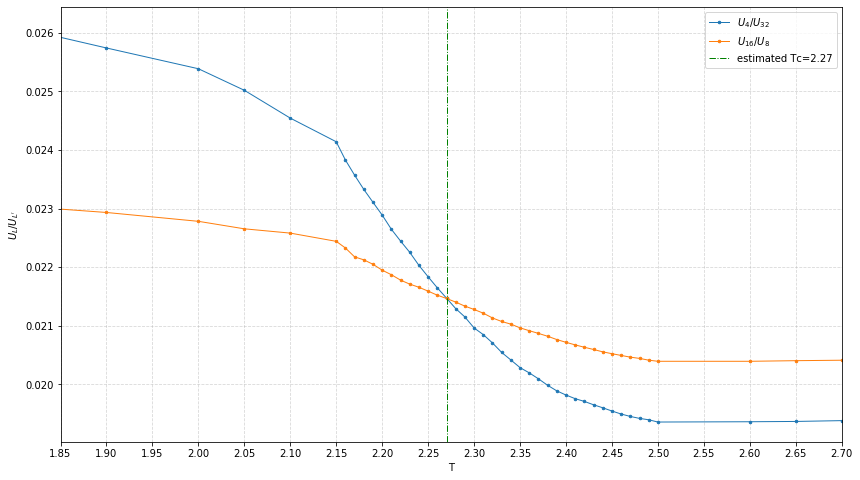

The final analysis produces a result of a Tc = 2.27 which agrees favourably with the theoretical value, for this reason we can conclude that the numerical results produced by the Monte Carlo simulation compare favourably with the theoretical results and are a viable and efficient alternative to an exact calculation.

# Data correlation

The Metropolis-Monte Carlo algorithm used in this simulation is a Markovian random process, so a single step is correlated with the previous one. We test a single spin-change fo each step, so the quantities compute from the lattice state could change only a bit for each step.
We want to estimate averaged quantities: we need to know how many step we need in order to have a small correlation between the quantites that we wants averaged, eg $m$ and $E$. 
The time-displaced autocorrelation of system energy $\chi(t)$ is a quantity that measure the correlation between the energy values wrt the temporal distance. This quantity is defined as an integral over an infinit interval of time but, in a numerical simulation, we have to use a discrete approximation over finite times. 

$$ \chi(t) = \int_{-\infty}^{+\infty}dt'(E(t')-<E>)(E(t'+t)-<E>)$$


Because we want to estimate the similarity between time-displaced energy-path of our sistem, we don't care about constants or normalization's factors.

$\chi(t)$ is expected to fall exponentialy as $\exp{\frac{-t}{\tau}}$: we can approximate statistical independence after 2 times the exponential denominator, kwnon as correlation time: so we sample $\frac{n_{mcs}}{2 \tau}$ independent measurements.

We need to estimate the correlation time $\tau$ that give us the steps distance necessary for obtain small correlated data.
We make measurements more often than this indication in order to get a chance for estimate $\tau$, also because we don't known the correlation time before the algorithm run.





In [ ]:
import statsmodels.tsa.stattools #module for time series analysis with FFT implementation
import numpy as np
# AUTOCORRELATION PROGRAM
size=32
lsize = size-1             # Array size of the lattice
n=size*size                # number of spin points on lattice
mcs=1000                  # number of Monte Carlo steps
np.random.seed(436675)     #seed for random number generator

# declaring the variables in calculating the observables 
E = np.float64(0)
de = 0.0
T = 2.4
name_file = "./lattice_32/32T_2.4.txt"    #load already thermalized lattices
lat =  np.loadtxt(name_file)
  

E=total_energy()
E_sweep = [E]

# Monte Carlo loop
for a in range(mcs):
    # Metropolis loop
    for b in range(n):
        pos_x,pos_y = choose_random_pos_lat()    
        if test_flip(pos_x,pos_y)==True:
            flip(pos_x,pos_y)
            E+=de

    E_sweep.append(E)                #store sweep's energy


acf = statsmodels.tsa.stattools.acf(np.array(E_sweep), fft = True)      #autocorrelation computation



In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(range(len(acf)),acf)
plt.axhline(np.exp(-1),c='r',linestyle='--')
plt.grid(linestyle='--',alpha=0.5)
plt.title("Autocorrelation function at T = 2.4 vs MC steps")
plt.xlabel("Time (lattice sweep)")
plt.ylabel(r'Autocorrelation  $\chi$')
plt.text(43,0.35,r'$\dfrac{1}{e}$',size=19,c='r',weight='bold')
plt.text(6.8,0.,r'$\tau$',size=18,c='g',weight='bold')
plt.arrow(7.5, 0.37,0,-0.37,color='g')
plt.show()

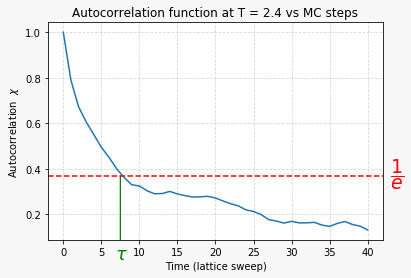



We computed $\tau$ for each temperature.

In [ ]:
# CORRELATION TIME PROGRAM
T=5.0                      # starting point for temperature
minT=0.5                   # minimum temperature
change=0.1                 #size of steps for temperature loop


# declaring the variables in calculating energy autocorrelation
E = np.float64(0)
de = 0.0
tcorr = []

temperatures = np.round(np.arange(minT,T+change,change),2)

for T in temperatures[::-1]:                #from above to below
    name_file = "./lattice_32/32T_" + str(T) + ".txt" #load already thermalized lattices
    lat =  np.loadtxt(name_file)
    
    E=total_energy()
    E_sweep = [E]

    # Monte Carlo loop
    for a in range(mcs):
        # Metropolis loop
        for b in range(n):
            pos_x,pos_y = choose_random_pos_lat()    
            if test_flip(pos_x,pos_y)==True:
                flip(pos_x,pos_y)
                E+=de

                
        E_sweep.append(E)                #store sweep's energy

    
    if (np.max(E_sweep) == np.min(E_sweep)):  #check if reach constants latttice is reached
        break

    acf = statsmodels.tsa.stattools.acf(np.array(E_sweep), fft = True)      #autocorrelation computation
    mask = acf < np.exp(-1)
    tcorr.append(np.argmax(mask))                               #estimation of correlation time

    
if len(tcorr) != len(temperatures):    
    arr_tcorr = np.concatenate([tcorr,np.oness(len(temperatures) - len(tcorr))])
    
plt.plot(temperatures,arr_tcorr[::-1])


In [ ]:
plt.plot(temperatures,arr_tcorr[::-1], 'o--')
plt.yticks(np.arange(0, 21, step=2))
plt.ylim([0,21])
plt.xlim([0.5,5])
plt.xticks(np.arange(0.5, 5+0.5, step=0.5))
plt.grid(linestyle='--',alpha=0.5)
plt.title(r'Correlation time ($\tau$) vs temperature (T)')
plt.xlabel("Temperature (T)")
plt.ylabel(r'Correlation time ($\tau$)')
plt.show()

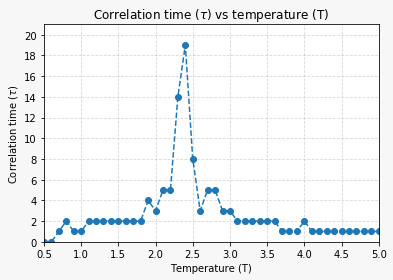


We noticed that $\tau$ increases near $T_{c}$. This a feature of Monte Carlo algorithm: as we approached to the phase transition, the correlation length increase (the finite size of our lattice make impossible for our quantities to diverge) so a change in a position can influence site far away. But our algorithm test one random site at time so, before all the influenced site were tested and updated, a lot of time could pass. This is an increment in $\tau$ known as critical slowing down.

In order to obtain good measurement the algorithm must run more near the pahse transition.